In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import koreanize_matplotlib
%config InlineBackend.figure_format = "retina"

In [3]:
from glob import glob
file_name = glob("서울시*.csv")
file_name

['서울시 우리마을가게 상권분석서비스(상권-상주인구).csv',
 '서울시 우리마을가게 상권분석서비스(상권-생활인구).csv',
 '서울시_우리마을가게_상권분석서비스(신_상권_점포)_2021년.csv',
 '서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv']

In [4]:
move_pop = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-생활인구).csv', encoding="cp949")
live_pop = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-상주인구).csv', encoding="cp949")
maechul = pd.read_csv('서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv', encoding="cp949")

# 데이터셋

## 생활인구
- 유동인구

In [5]:
move_pop.head(2)

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,여성연령대_60_이상_토요일시간대_3_생활인구_수,여성연령대_60_이상_토요일시간대_4_생활인구_수,여성연령대_60_이상_토요일시간대_5_생활인구_수,여성연령대_60_이상_토요일시간대_6_생활인구_수,여성연령대_60_이상_일요일시간대_1_생활인구_수,여성연령대_60_이상_일요일시간대_2_생활인구_수,여성연령대_60_이상_일요일시간대_3_생활인구_수,여성연령대_60_이상_일요일시간대_4_생활인구_수,여성연령대_60_이상_일요일시간대_5_생활인구_수,여성연령대_60_이상_일요일시간대_6_생활인구_수
0,2022,2,U,관광특구,1001496,강남 마이스 관광특구,106859,53586,53273,7510,...,185,181,154,43,55,112,163,152,121,38
1,2022,2,U,관광특구,1001495,잠실 관광특구,3561819,1712126,1849694,387394,...,6862,6916,8368,4345,6891,7064,6357,6340,7521,4070


In [6]:
# 매출데이터에 맞춰 2021년 자료만 남기기
move_pop = move_pop[move_pop["기준 년코드"]==2021]

In [7]:
# move_pop.rename(columns={'상권 코드':'상권_코드', '상권_구분_코드_x':'상권_구분_코드', '상권_코드_명_x':'상권_코드_명'}, inplace=True)

In [8]:
# 생활인구 데이터 중 사용할 컬럼 남기기
move_pop = move_pop[['기준 년코드', '상권_코드', '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수',
                     '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', 
                     '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수',
                     '시간대_1_생활인구_수', '시간대_2_생활인구_수', '시간대_3_생활인구_수',
                     '시간대_4_생활인구_수', '시간대_5_생활인구_수', '시간대_6_생활인구_수',
                     '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', 
                     '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수']]
# move_pop.to_csv("생활인구_sample.csv", index=False)

In [9]:
# 컬럼 이름 변경
move_pop.columns = ['기준_년코드', '상권_코드', '총_생활인구_수', '남성_생활인구', '여성_생활인구', 
                    '10대_생활인구', '20대_생활인구', '30대_생활인구', '40대_생활인구', '50대_생활인구', '60대이상_생활인구',
                    '00~06시_생활인구', '06~11시_생활인구', '11~14시_생활인구', '14~17시_생활인구',
                    '17~21시_생활인구', '21~24시_생활인구', '월요일_생활인구', '화요일_생활인구', '수요일_생활인구', 
                    '목요일_생활인구', '금요일_생활인구', '토요일_생활인구', '일요일_생활인구']

## 거주인구

In [10]:
live_pop.head(2)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권 코드,총 상주인구 수,남성 상주인구 수,여성 상주인구 수,연령대 10 상주인구 수,연령대 20 상주인구 수,...,여성연령대 10 상주인구 수,여성연령대 20 상주인구 수,여성연령대 30 상주인구 수,여성연령대 40 상주인구 수,여성연령대 50 상주인구 수,여성연령대 60 이상 상주인구 수,총 가구 수,아파트 가구 수,비 아파트 가구 수,상권 코드 명
0,2022,2,U,관광특구,1001496,29,16,13,2,4,...,2,2,1,2,4,2,18,0,18,강남 마이스 관광특구
1,2022,2,U,관광특구,1001495,9639,4250,5389,819,2254,...,395,1435,1454,728,548,829,6122,0,6122,잠실 관광특구


In [11]:
# 매출데이터에 맞춰 2021년 자료만 남기기
live_pop = live_pop[live_pop["기준_년_코드"]==2021]

In [12]:
# live_pop.rename(columns={'상권 코드':'상권_코드', '상권_구분_코드_x':'상권_구분_코드',
#                          '상권_코드_명_x':'상권_코드_명'}, inplace=True)

In [13]:
# 거주 인구 데이터 중 사용할 컬럼 남기기
live_pop = live_pop.drop(columns=['기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', 
                                  '총 가구 수', '아파트 가구 수', '비 아파트 가구 수', '상권 코드 명'])
live_pop.columns

Index(['기준_년_코드', '상권 코드', '총 상주인구 수', '남성 상주인구 수', '여성 상주인구 수',
       '연령대 10 상주인구 수', '연령대 20 상주인구 수', '연령대 30 상주인구 수', '연령대 40 상주인구 수',
       '연령대 50 상주인구 수', '연령대 60 이상 상주인구 수', '남성연령대 10 상주인구 수',
       '남성연령대 20 상주인구 수', '남성연령대 30 상주인구 수', '남성연령대 40 상주인구 수',
       '남성연령대 50 상주인구 수', '남성연령대 60 이상 상주인구 수', '여성연령대 10 상주인구 수',
       '여성연령대 20 상주인구 수', '여성연령대 30 상주인구 수', '여성연령대 40 상주인구 수',
       '여성연령대 50 상주인구 수', '여성연령대 60 이상 상주인구 수'],
      dtype='object')

In [14]:
# 컬럼 이름 변경
live_pop.columns = ['기준_년코드', '상권_코드', '총_상주인구_수', '남성_상주인구', '여성_상주인구',
                    '10대_상주인구', '20대_상주인구', '30대_상주인구', '40대_상주인구', '50대_상주인구', '60대이상_상주인구', 
                    '남성_10대_상주인구', '남성_20대_상주인구', '남성_30대_상주인구', '남성_40대_상주인구',
                    '남성_50대_상주인구', '남성_60대이상_상주인구', '여성_10대_상주인구', '여성_20대_상주인구', 
                    '여성_30대_상주인구', '여성_40대_상주인구', '여성_50대_상주인구', '여성_60대이상_상주인구']

## 매출, 점포수
- 2021년 데이터

In [15]:
maechul.head(2)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391,25502,...,157,15667,7253,108,1098,2013,4344,7792,7568,28
1,2021,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,122957138,12039,...,0,6679,4293,52,926,1222,2698,3404,2670,9


In [16]:
# ~매출_비율과 같이 비율이 들어간 컬럼 제거
drop_columns = [col for col in maechul.columns if "비율" in col]
maechul = maechul.drop(columns=drop_columns, axis=1)

In [17]:
# 매출 데이터 중 사용할 컬럼 남기기
maechul = maechul.drop(columns=['기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_건수', '주중_매출_금액',
       '주말_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수',
       '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수',
       '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수'])

In [18]:
# 컬럼 이름 변경
maechul.columns = ['기준_년코드', '상권_코드', '분기당_매출_금액', '월요일_매출', '화요일_매출', '수요일_매출',
                   '목요일_매출', '금요일_매출', '토요일_매출', '일요일_매출', '00~06시_매출', '06~11시_매출', 
                   '11~14시_매출', '14~17시_매출', '17~21시_매출', '21~24시_매출', '남성_매출', '여성_매출',
                   '10대_매출', '20대_매출', '30대_매출', '40대_매출', '50대_매출', '60대이상_매출', '점포수']

# 상권 코드 기준으로 merge

In [19]:
df_code = pd.read_csv('db431fa9896e1e12.csv',encoding="utf-8")

In [20]:
df_code = df_code.drop_duplicates()
df_code.tail(2)

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,행정동코드,행정동명,시군구명
130900,202112,U,관광특구,1001496,강남 마이스 관광특구,205310,445727,11680,11680580,11680580,삼성1동,강남구
130934,202112,U,관광특구,1001491,이태원 관광특구,199503,448326,11170,11170650,11170650,이태원1동,용산구


In [21]:
df_code = df_code.drop(columns=['기준_년월_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드_명',
                                '엑스좌표_값', '와이좌표_값', '시군구_코드', '행정동코드'])

## 생활인구 merge

In [22]:
# move_pop_m : move_pop_merge, 유동인구데이터와 상권코드 데이터 merge
move_pop_m = pd.merge(move_pop, df_code, on=['상권_코드'], how='left')
move_pop_m = move_pop_m.drop_duplicates()
print(move_pop_m.shape)
move_pop_m.tail(2)

(6672, 27)


,기준_년코드,상권_코드,총_생활인구_수,남성_생활인구,여성_생활인구,10대_생활인구,20대_생활인구,30대_생활인구,40대_생활인구,50대_생활인구,...,월요일_생활인구,화요일_생활인구,수요일_생활인구,목요일_생활인구,금요일_생활인구,토요일_생활인구,일요일_생활인구,행정동_코드,행정동명,시군구명
6670,2021,2110002,289007,132955,156052,50153,37820,34412,43016,43583,...,42010,41989,41940,41554,41759,40176,39581,11110570,무악동,종로구
6671,2021,2110001,188663,87315,101347,33841,20623,18474,30157,32870,...,26475,26377,26398,26644,26237,28005,28528,11110560,평창동,종로구


In [23]:
move_pop_m = move_pop_m.groupby(["기준_년코드","시군구명","행정동명"]).sum()
move_pop_m = move_pop_m.reset_index()
print(move_pop_m.shape)
move_pop_m.head(2)

(402, 27)


,기준_년코드,시군구명,행정동명,상권_코드,총_생활인구_수,남성_생활인구,여성_생활인구,10대_생활인구,20대_생활인구,30대_생활인구,...,17~21시_생활인구,21~24시_생활인구,월요일_생활인구,화요일_생활인구,수요일_생활인구,목요일_생활인구,금요일_생활인구,토요일_생활인구,일요일_생활인구,행정동_코드
0,2021,강남구,개포1동,8443972,137388,64092,73298,26412,12785,23001,...,20040,17631,20395,19157,19288,19856,19667,20154,18868,46722640
1,2021,강남구,개포2동,16965216,2726991,1290584,1436407,551533,279701,337752,...,443625,296194,391782,396697,396070,398946,394407,384518,364572,93445360


## 거주인구 merge

In [24]:
live_pop_m = pd.merge(live_pop, df_code, on="상권_코드", how="left")
live_pop_m = live_pop_m.drop_duplicates()
print(live_pop_m.shape)
live_pop_m.head(2)

(1631, 26)


,기준_년코드,상권_코드,총_상주인구_수,남성_상주인구,여성_상주인구,10대_상주인구,20대_상주인구,30대_상주인구,40대_상주인구,50대_상주인구,...,남성_60대이상_상주인구,여성_10대_상주인구,여성_20대_상주인구,여성_30대_상주인구,여성_40대_상주인구,여성_50대_상주인구,여성_60대이상_상주인구,행정동_코드,행정동명,시군구명
0,2021,1001496,29,16,13,2,4,2,4,9,...,6,2,2,1,2,4,2,11680580,삼성1동,강남구
1,2021,1001495,9639,4250,5389,819,2254,2576,1299,1081,...,781,395,1435,1454,728,548,829,11710566,오륜동,송파구


In [25]:
live_pop_m = live_pop_m.groupby(["기준_년코드","시군구명","행정동명"]).sum()
live_pop_m = live_pop_m.reset_index()
print(live_pop_m.shape)
live_pop_m.head(2)

(401, 26)


,기준_년코드,시군구명,행정동명,상권_코드,총_상주인구_수,남성_상주인구,여성_상주인구,10대_상주인구,20대_상주인구,30대_상주인구,...,남성_40대_상주인구,남성_50대_상주인구,남성_60대이상_상주인구,여성_10대_상주인구,여성_20대_상주인구,여성_30대_상주인구,여성_40대_상주인구,여성_50대_상주인구,여성_60대이상_상주인구,행정동_코드
0,2021,강남구,개포1동,2110993,234,121,113,27,36,39,...,14,21,23,13,12,14,19,21,34,11680660
1,2021,강남구,개포2동,4241304,1889,954,935,291,241,261,...,136,143,239,131,103,123,149,158,271,23361340


## 매출, 점포수 merge

In [26]:
maechul_m = pd.merge(maechul, df_code, on=['상권_코드'], how='left')
maechul_m = maechul_m.drop_duplicates()
print(maechul_m.shape)
maechul_m.tail(2)

(140814, 28)


,기준_년코드,상권_코드,분기당_매출_금액,월요일_매출,화요일_매출,수요일_매출,목요일_매출,금요일_매출,토요일_매출,일요일_매출,...,10대_매출,20대_매출,30대_매출,40대_매출,50대_매출,60대이상_매출,점포수,행정동_코드,행정동명,시군구명
140828,2021,1001496,12566919,0,0,12566919,0,0,0,0,...,0,0,0,0,12566919,0,4,11680580,삼성1동,강남구
140829,2021,1001496,10000000,0,0,0,2370401,3144513,1964692,2520394,...,0,137299,6562539,1366053,1934109,0,8,11680580,삼성1동,강남구


In [27]:
maechul_m = maechul_m.groupby(["기준_년코드","시군구명","행정동명"]).sum()
maechul_m= maechul_m.reset_index()
print(maechul_m.shape)
maechul_m.head(2)

(401, 28)


,기준_년코드,시군구명,행정동명,상권_코드,분기당_매출_금액,월요일_매출,화요일_매출,수요일_매출,목요일_매출,금요일_매출,...,남성_매출,여성_매출,10대_매출,20대_매출,30대_매출,40대_매출,50대_매출,60대이상_매출,점포수,행정동_코드
0,2021,강남구,개포1동,6332979,7392885,387352,747035,442688,1095653,1311461,...,2910673,4482212,0,0,1626879,597628,1510672,3657706,9,35041980
1,2021,강남구,개포2동,632128140,101172867848,14972126049,15030564107,15739719364,14744318259,17193676027,...,44153650864,49798769255,1044272792,7210110864,11435381989,26979690092,27802459678,19480371822,3526,3480839660


## 전체 merge

In [28]:
df_all = pd.merge(maechul_m, move_pop_m, on='행정동명', how='left')

In [29]:
df_all.shape

(403, 54)

In [30]:
df_all = df_all.drop_duplicates()

In [31]:
print(df_all.shape)
df_all.head(2)

(403, 54)


,기준_년코드_x,시군구명_x,행정동명,상권_코드_x,분기당_매출_금액,월요일_매출,화요일_매출,수요일_매출,목요일_매출,금요일_매출,...,17~21시_생활인구,21~24시_생활인구,월요일_생활인구,화요일_생활인구,수요일_생활인구,목요일_생활인구,금요일_생활인구,토요일_생활인구,일요일_생활인구,행정동_코드_y
0,2021,강남구,개포1동,6332979,7392885,387352,747035,442688,1095653,1311461,...,20040,17631,20395,19157,19288,19856,19667,20154,18868,46722640
1,2021,강남구,개포2동,632128140,101172867848,14972126049,15030564107,15739719364,14744318259,17193676027,...,443625,296194,391782,396697,396070,398946,394407,384518,364572,93445360


In [32]:
df_all = pd.merge(df_all, live_pop_m, on="행정동명", how="left")

In [33]:
df_all = df_all.drop_duplicates()

In [34]:
print(df_all.shape)
df_all.head(2)

(407, 79)


,기준_년코드_x,시군구명_x,행정동명,상권_코드_x,분기당_매출_금액,월요일_매출,화요일_매출,수요일_매출,목요일_매출,금요일_매출,...,남성_40대_상주인구,남성_50대_상주인구,남성_60대이상_상주인구,여성_10대_상주인구,여성_20대_상주인구,여성_30대_상주인구,여성_40대_상주인구,여성_50대_상주인구,여성_60대이상_상주인구,행정동_코드
0,2021,강남구,개포1동,6332979,7392885,387352,747035,442688,1095653,1311461,...,14.0,21.0,23.0,13.0,12.0,14.0,19.0,21.0,34.0,11680660.0
1,2021,강남구,개포2동,632128140,101172867848,14972126049,15030564107,15739719364,14744318259,17193676027,...,136.0,143.0,239.0,131.0,103.0,123.0,149.0,158.0,271.0,23361340.0


In [35]:
df_all = df_all.drop(columns=['시군구명_x', '기준_년코드_x', '상권_코드_x', '행정동_코드_x',
                                        '기준_년코드_y', '상권_코드_y', '행정동_코드_y', '시군구명_y'])

In [36]:
df_all = df_all.groupby(["기준_년코드","시군구명","행정동명"]).sum()
df_all= df_all.reset_index()
print(df_all.shape)

(400, 71)


## 상관분석용 데이터셋
- 생활인구, 거주인구, 매출, 점포수 데이터에서 매출관련 컬럼을 제외하지 않으면
- 상관분석에서 해당 컬럼들 점수가 높게 나옴
- 매출과 상관관계가 높은 다른 컬럼들을 확인하기 위해 상관분석용 데이터셋 생성

In [37]:
df_all.columns

Index(['기준_년코드', '시군구명', '행정동명', '분기당_매출_금액', '월요일_매출', '화요일_매출', '수요일_매출',
       '목요일_매출', '금요일_매출', '토요일_매출', '일요일_매출', '00~06시_매출', '06~11시_매출',
       '11~14시_매출', '14~17시_매출', '17~21시_매출', '21~24시_매출', '남성_매출', '여성_매출',
       '10대_매출', '20대_매출', '30대_매출', '40대_매출', '50대_매출', '60대이상_매출', '점포수',
       '총_생활인구_수', '남성_생활인구', '여성_생활인구', '10대_생활인구', '20대_생활인구', '30대_생활인구',
       '40대_생활인구', '50대_생활인구', '60대이상_생활인구', '00~06시_생활인구', '06~11시_생활인구',
       '11~14시_생활인구', '14~17시_생활인구', '17~21시_생활인구', '21~24시_생활인구', '월요일_생활인구',
       '화요일_생활인구', '수요일_생활인구', '목요일_생활인구', '금요일_생활인구', '토요일_생활인구', '일요일_생활인구',
       '상권_코드', '총_상주인구_수', '남성_상주인구', '여성_상주인구', '10대_상주인구', '20대_상주인구',
       '30대_상주인구', '40대_상주인구', '50대_상주인구', '60대이상_상주인구', '남성_10대_상주인구',
       '남성_20대_상주인구', '남성_30대_상주인구', '남성_40대_상주인구', '남성_50대_상주인구',
       '남성_60대이상_상주인구', '여성_10대_상주인구', '여성_20대_상주인구', '여성_30대_상주인구',
       '여성_40대_상주인구', '여성_50대_상주인구', '여성_60대이상_상주인구', '행정동_코드'],
      dtype='object')

In [38]:
df_all_mini = df_all.drop(columns=['월요일_매출', '화요일_매출', '수요일_매출',
       '목요일_매출', '금요일_매출', '토요일_매출', '일요일_매출', '00~06시_매출', '06~11시_매출',
       '11~14시_매출', '14~17시_매출', '17~21시_매출', '21~24시_매출', '남성_매출', '여성_매출',
       '10대_매출', '20대_매출', '30대_매출', '40대_매출', '50대_매출', '60대이상_매출'])

# 시각화

## 구별 총 유동인구

In [39]:
gu_move_pop = move_pop_m.pivot_table(index="시군구명", values="총_생활인구_수", aggfunc=sum
                                      ).sort_values("총_생활인구_수", ascending=False)
gu_move_pop

,총_생활인구_수
시군구명,
강남구,329704232
강동구,280956360
송파구,279306289
관악구,278221761
은평구,250660214
강서구,244861550
마포구,236538403
서초구,227805969
광진구,227338959


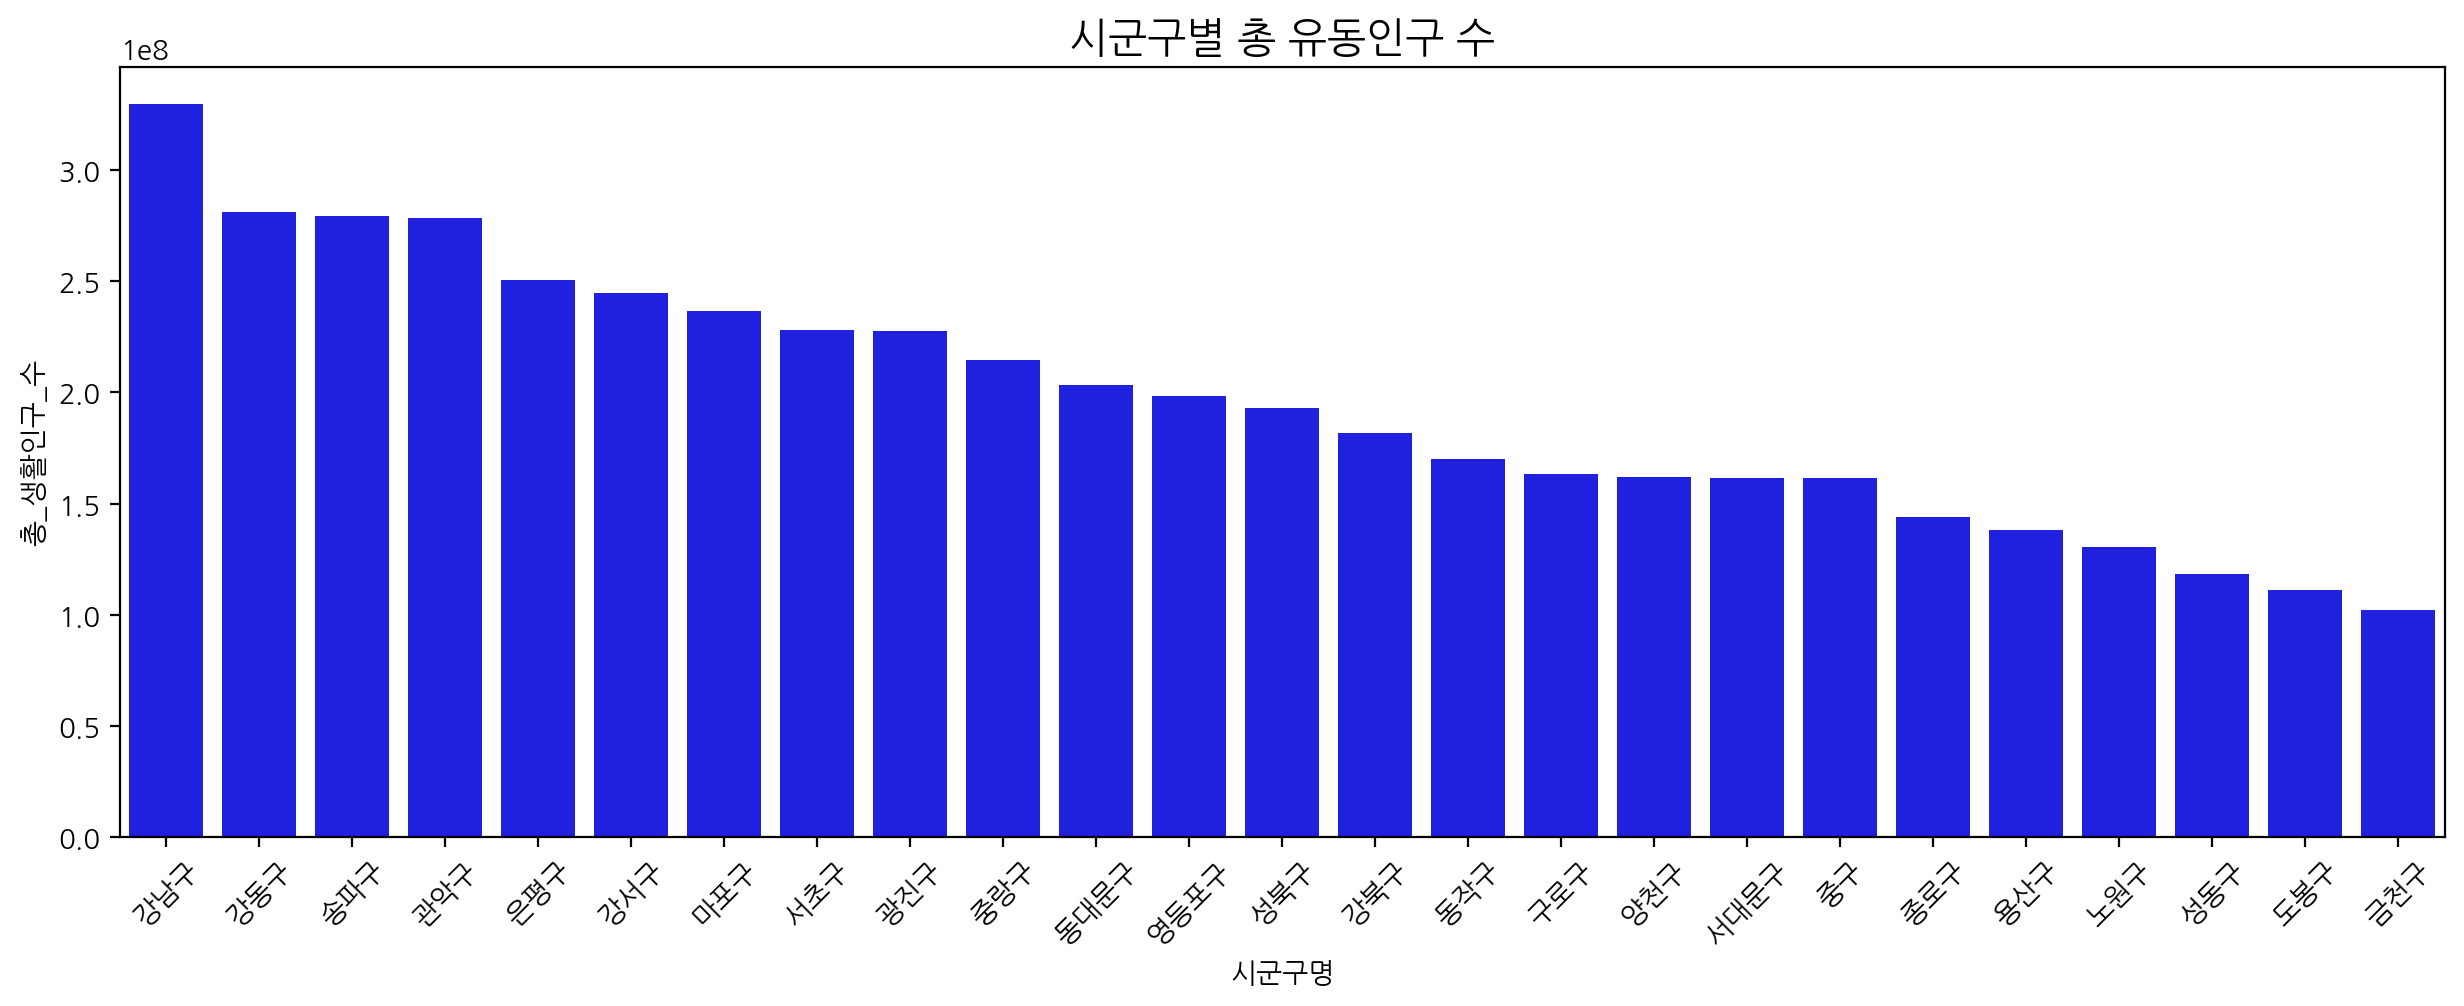

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(data=gu_move_pop, x=gu_move_pop.index, y="총_생활인구_수", ci=None, color="blue")
plt.title("시군구별 총 유동인구 수", fontsize=15)
plt.xticks(rotation=45);

Text(0.5, 1.0, '시군구별 총 유동인구 수')

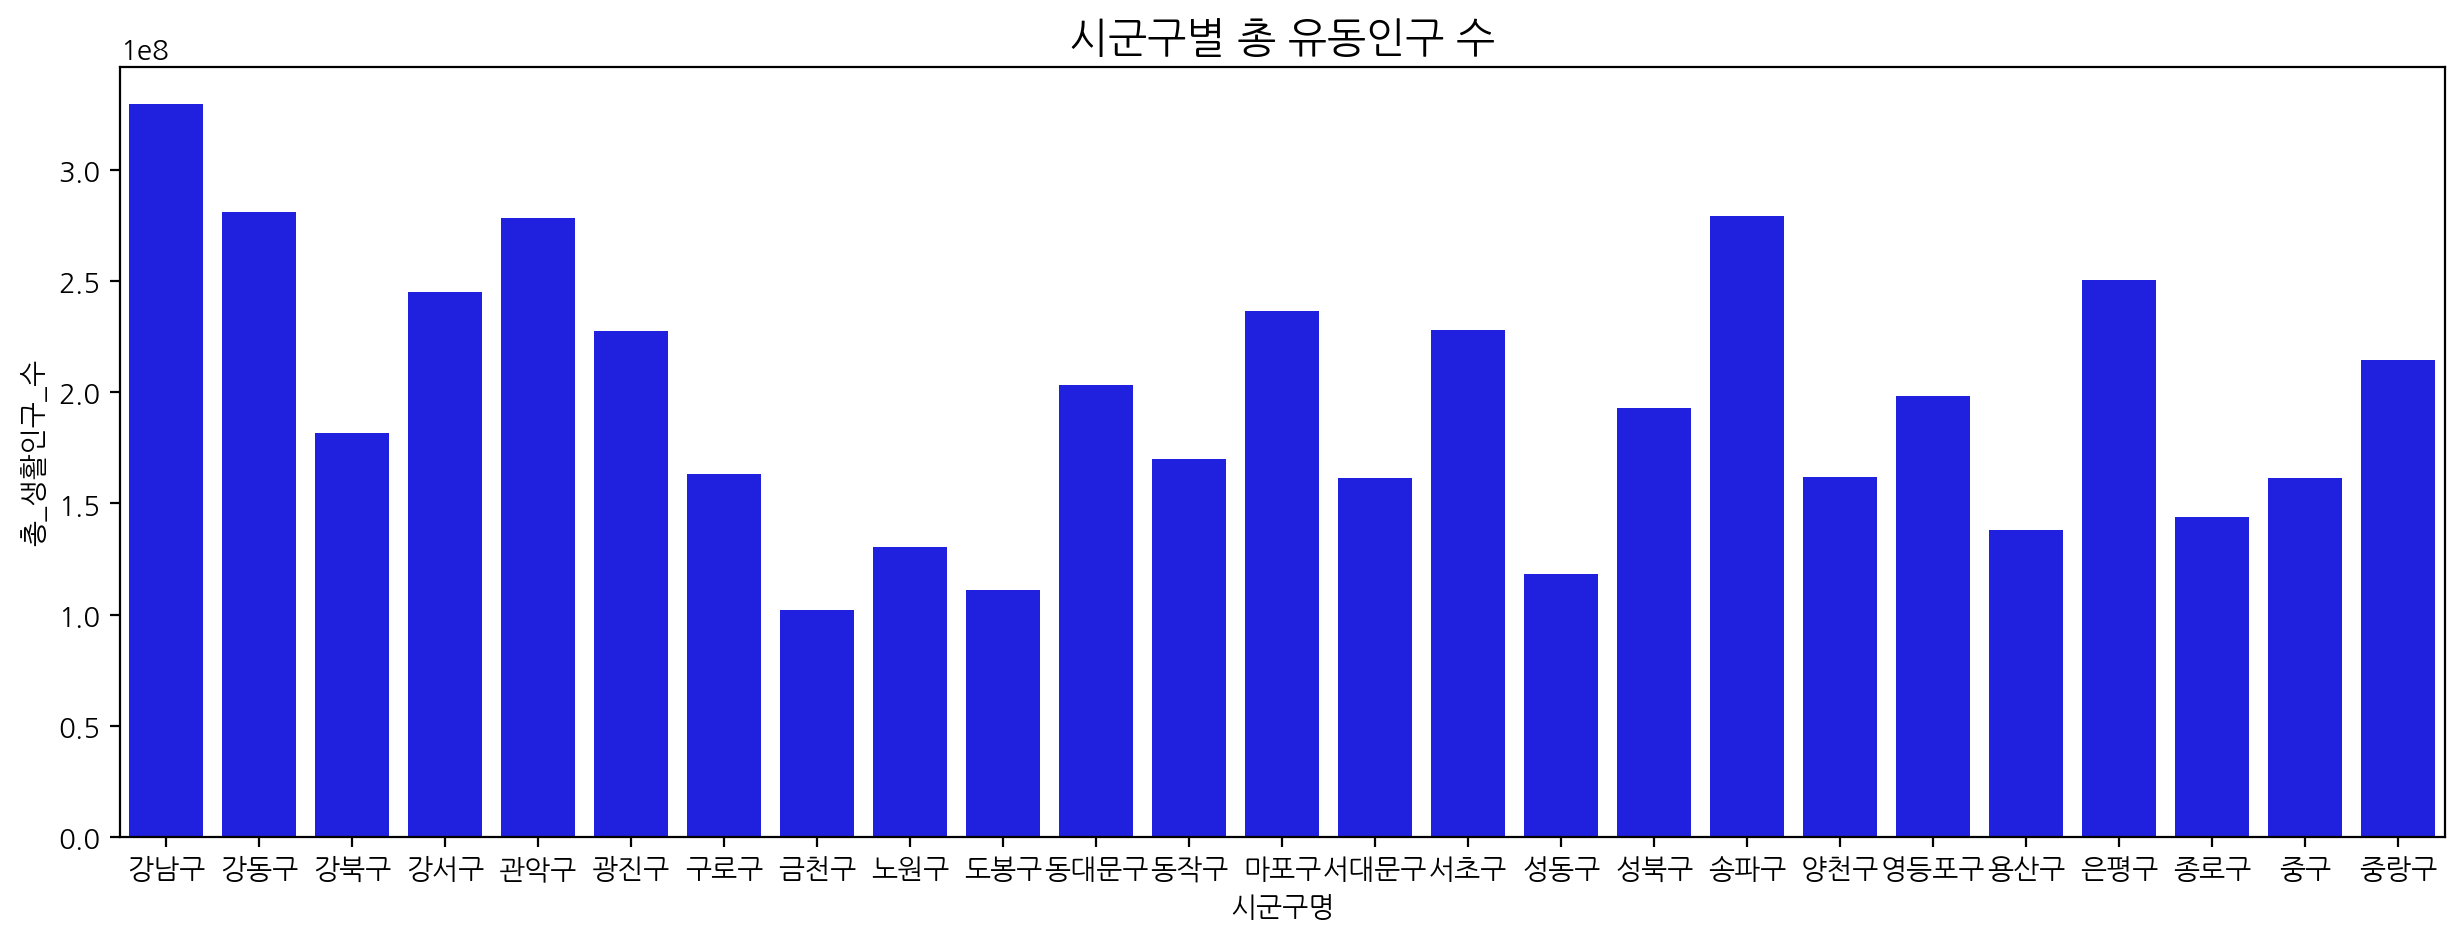

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(data=move_pop_m, x="시군구명", y="총_생활인구_수", estimator=sum, ci=None, color="blue")
plt.title("시군구별 총 유동인구 수", fontsize=15)

Text(0.5, 1.0, '시군구별 총 유동인구 수')

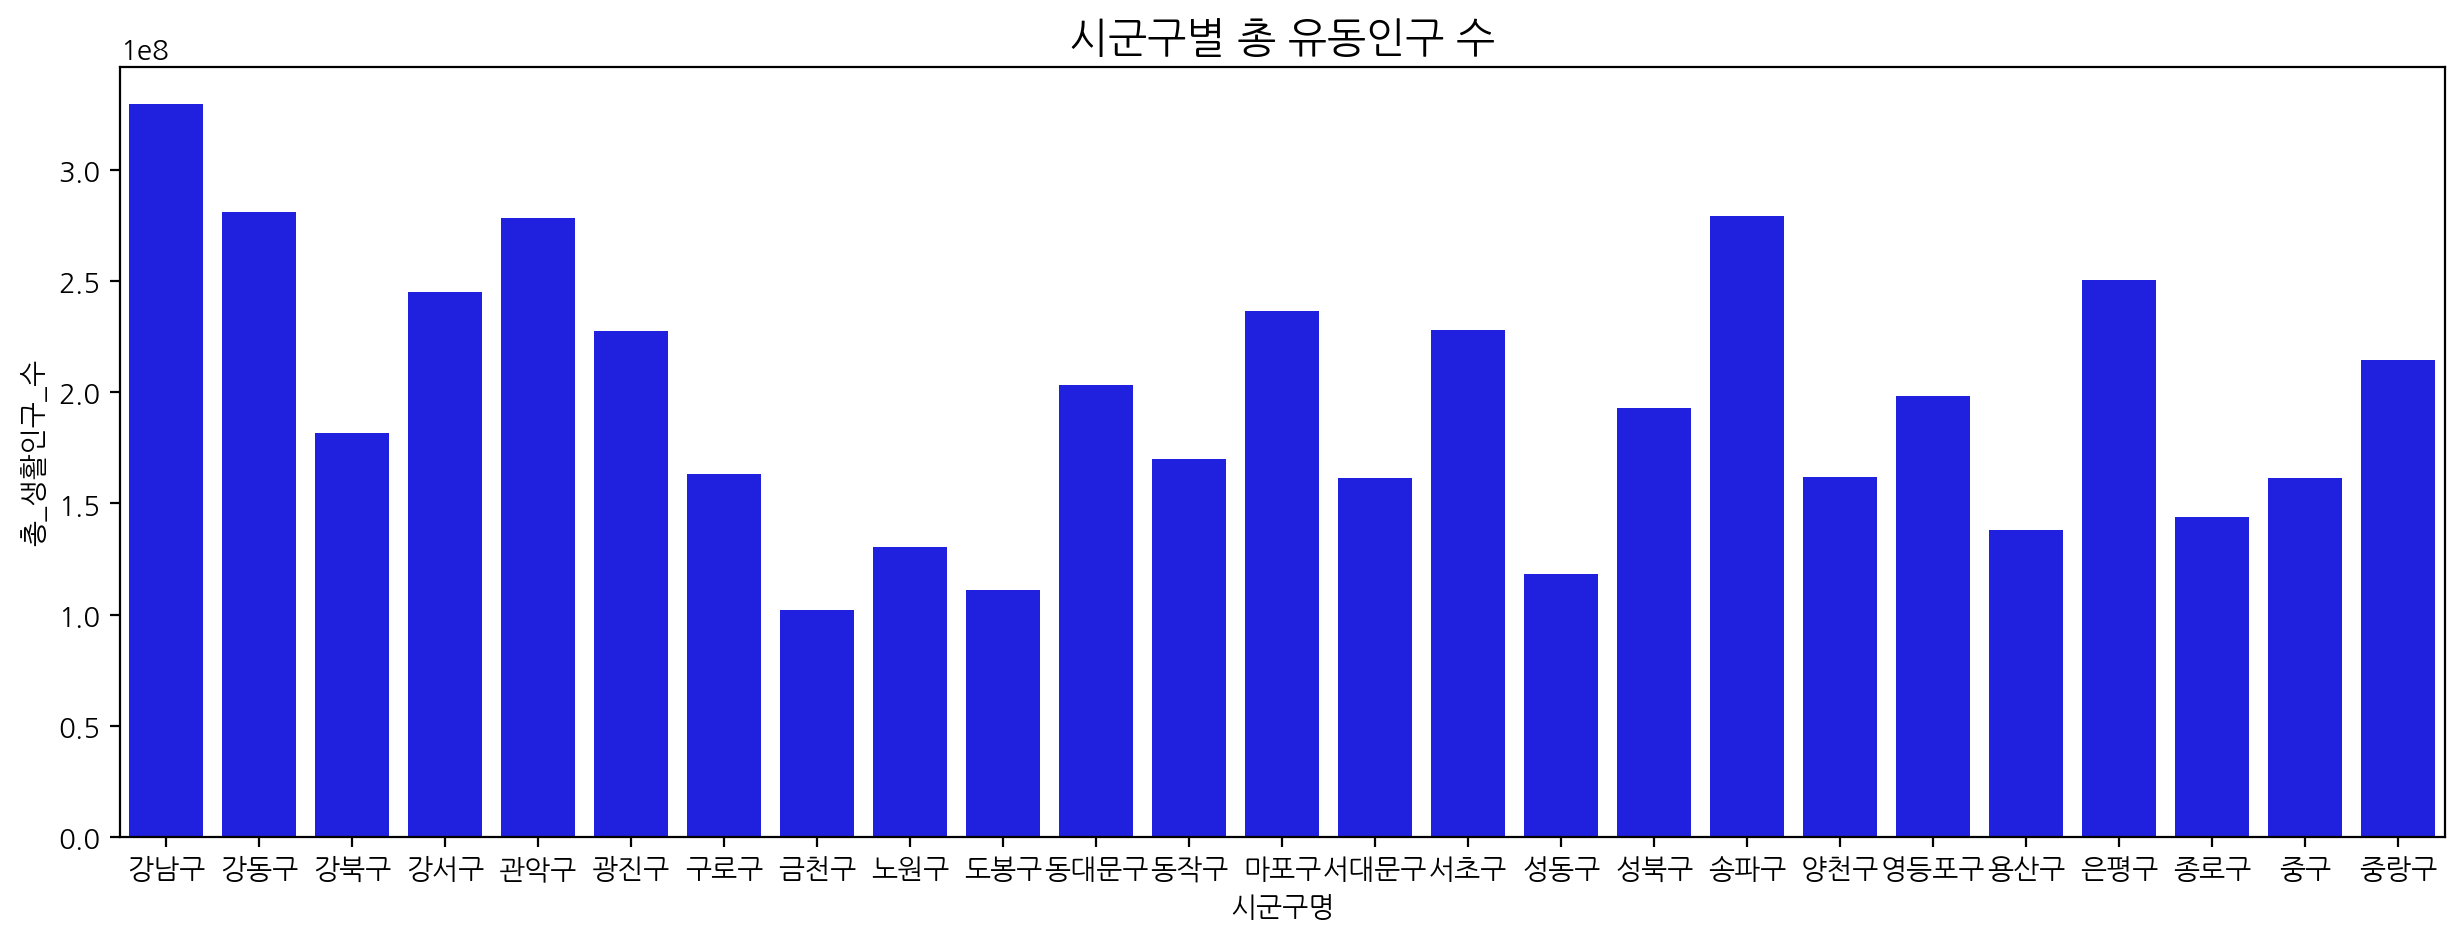

In [42]:
# 시군구명 가나다 순
plt.figure(figsize=(15,5))
sns.barplot(data=move_pop_m.sort_values("시군구명"), x="시군구명", y="총_생활인구_수" ,estimator=sum, ci=None, color="blue")
plt.title("시군구별 총 유동인구 수", fontsize=15)

## 구별 총 거주인구

In [43]:
gu_live_pop = live_pop_m.pivot_table(index="시군구명", values="총_상주인구_수", aggfunc=sum
                                      ).sort_values("총_상주인구_수", ascending=False)
gu_live_pop

,총_상주인구_수
시군구명,
송파구,260577
관악구,235464
강서구,235011
은평구,219348
강동구,207500
광진구,197600
중랑구,191411
강남구,188582
양천구,171901


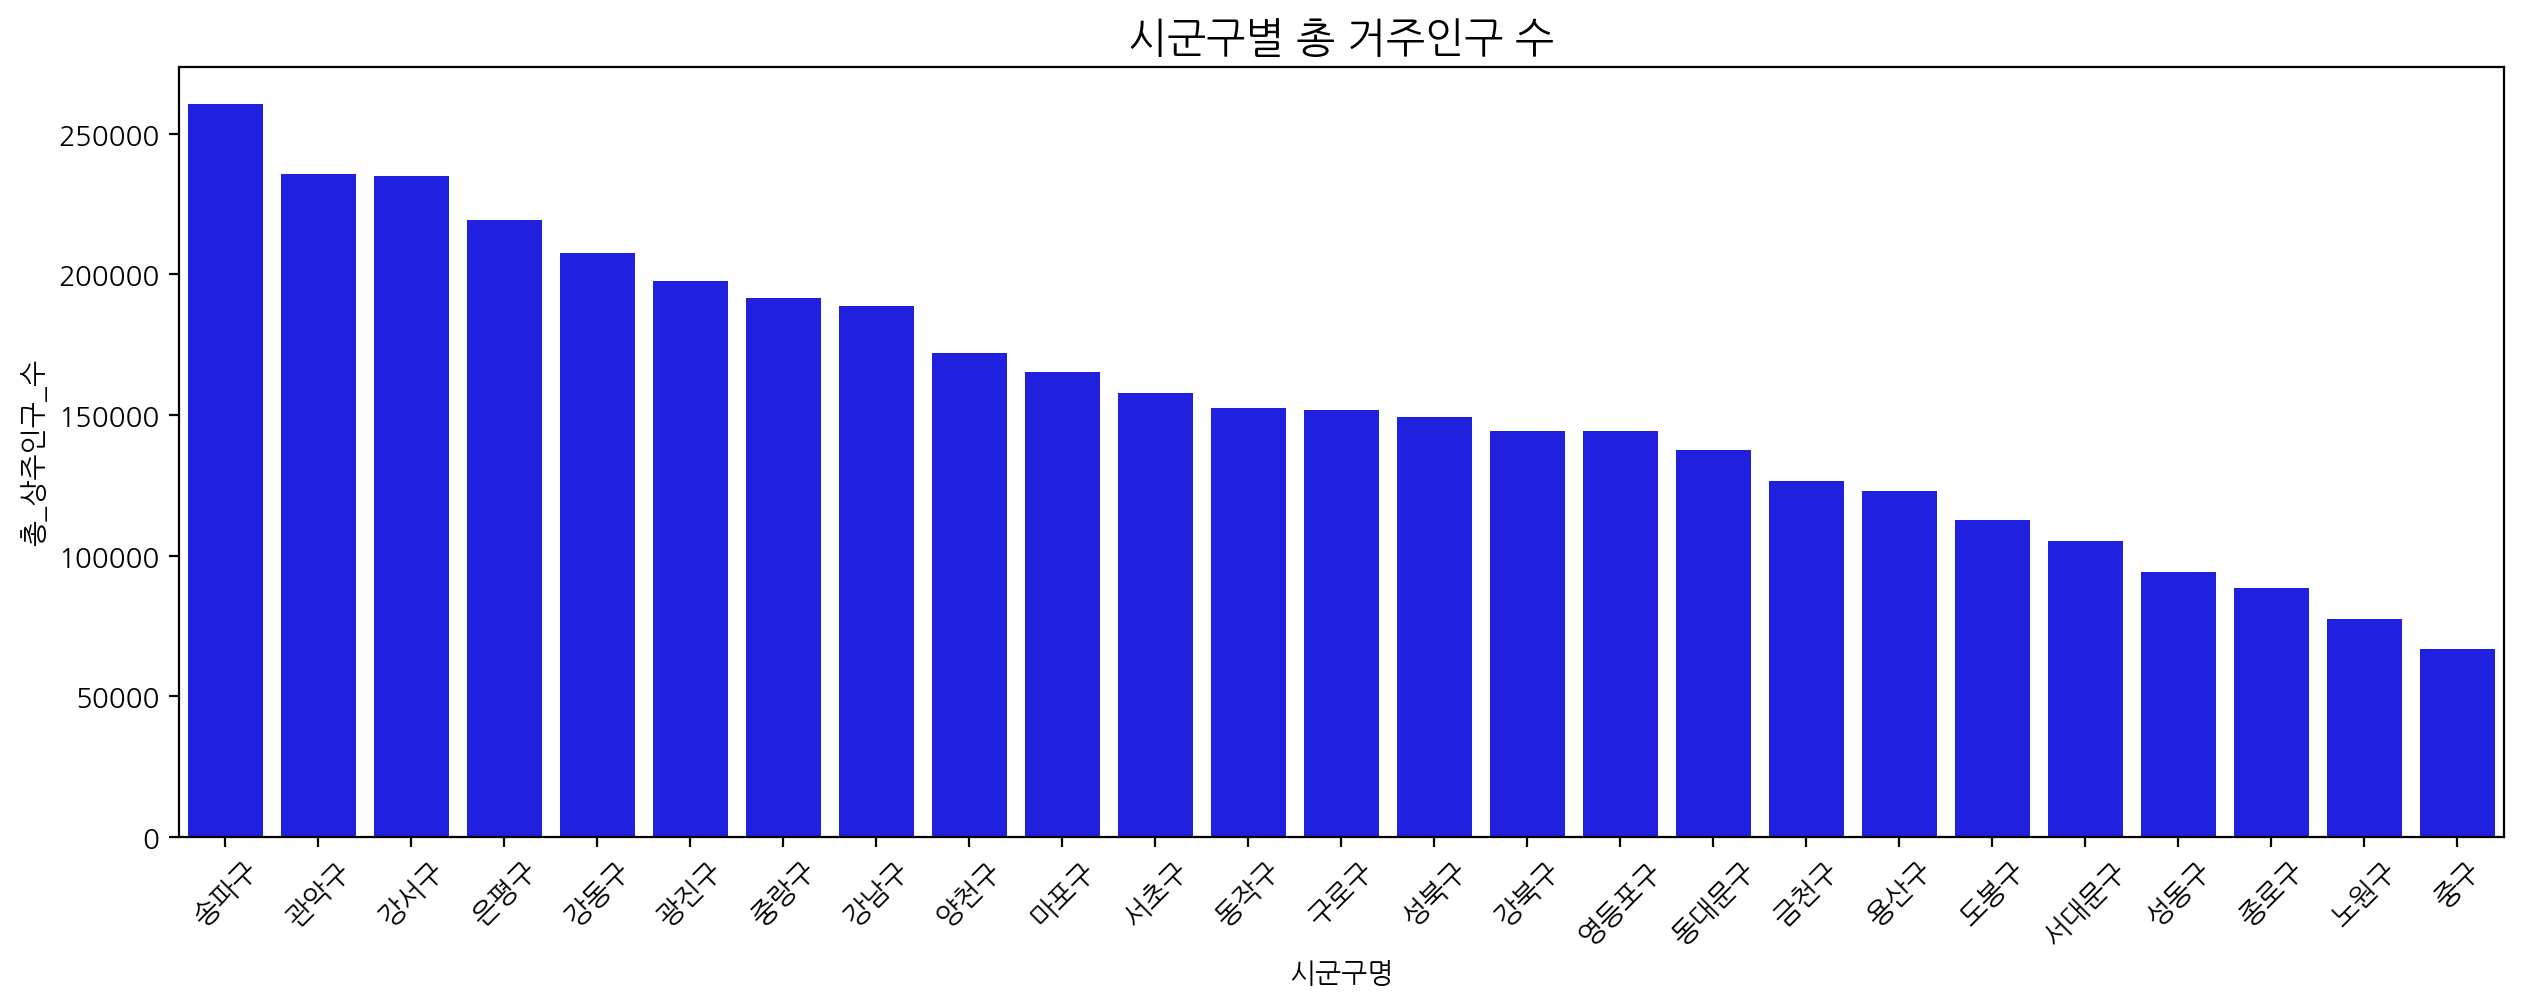

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(data=gu_live_pop, x=gu_live_pop.index, y="총_상주인구_수", ci=None, color="blue")
plt.title("시군구별 총 거주인구 수", fontsize=15)
plt.xticks(rotation=45);

Text(0.5, 1.0, '시군구별 총 거주인구 수')

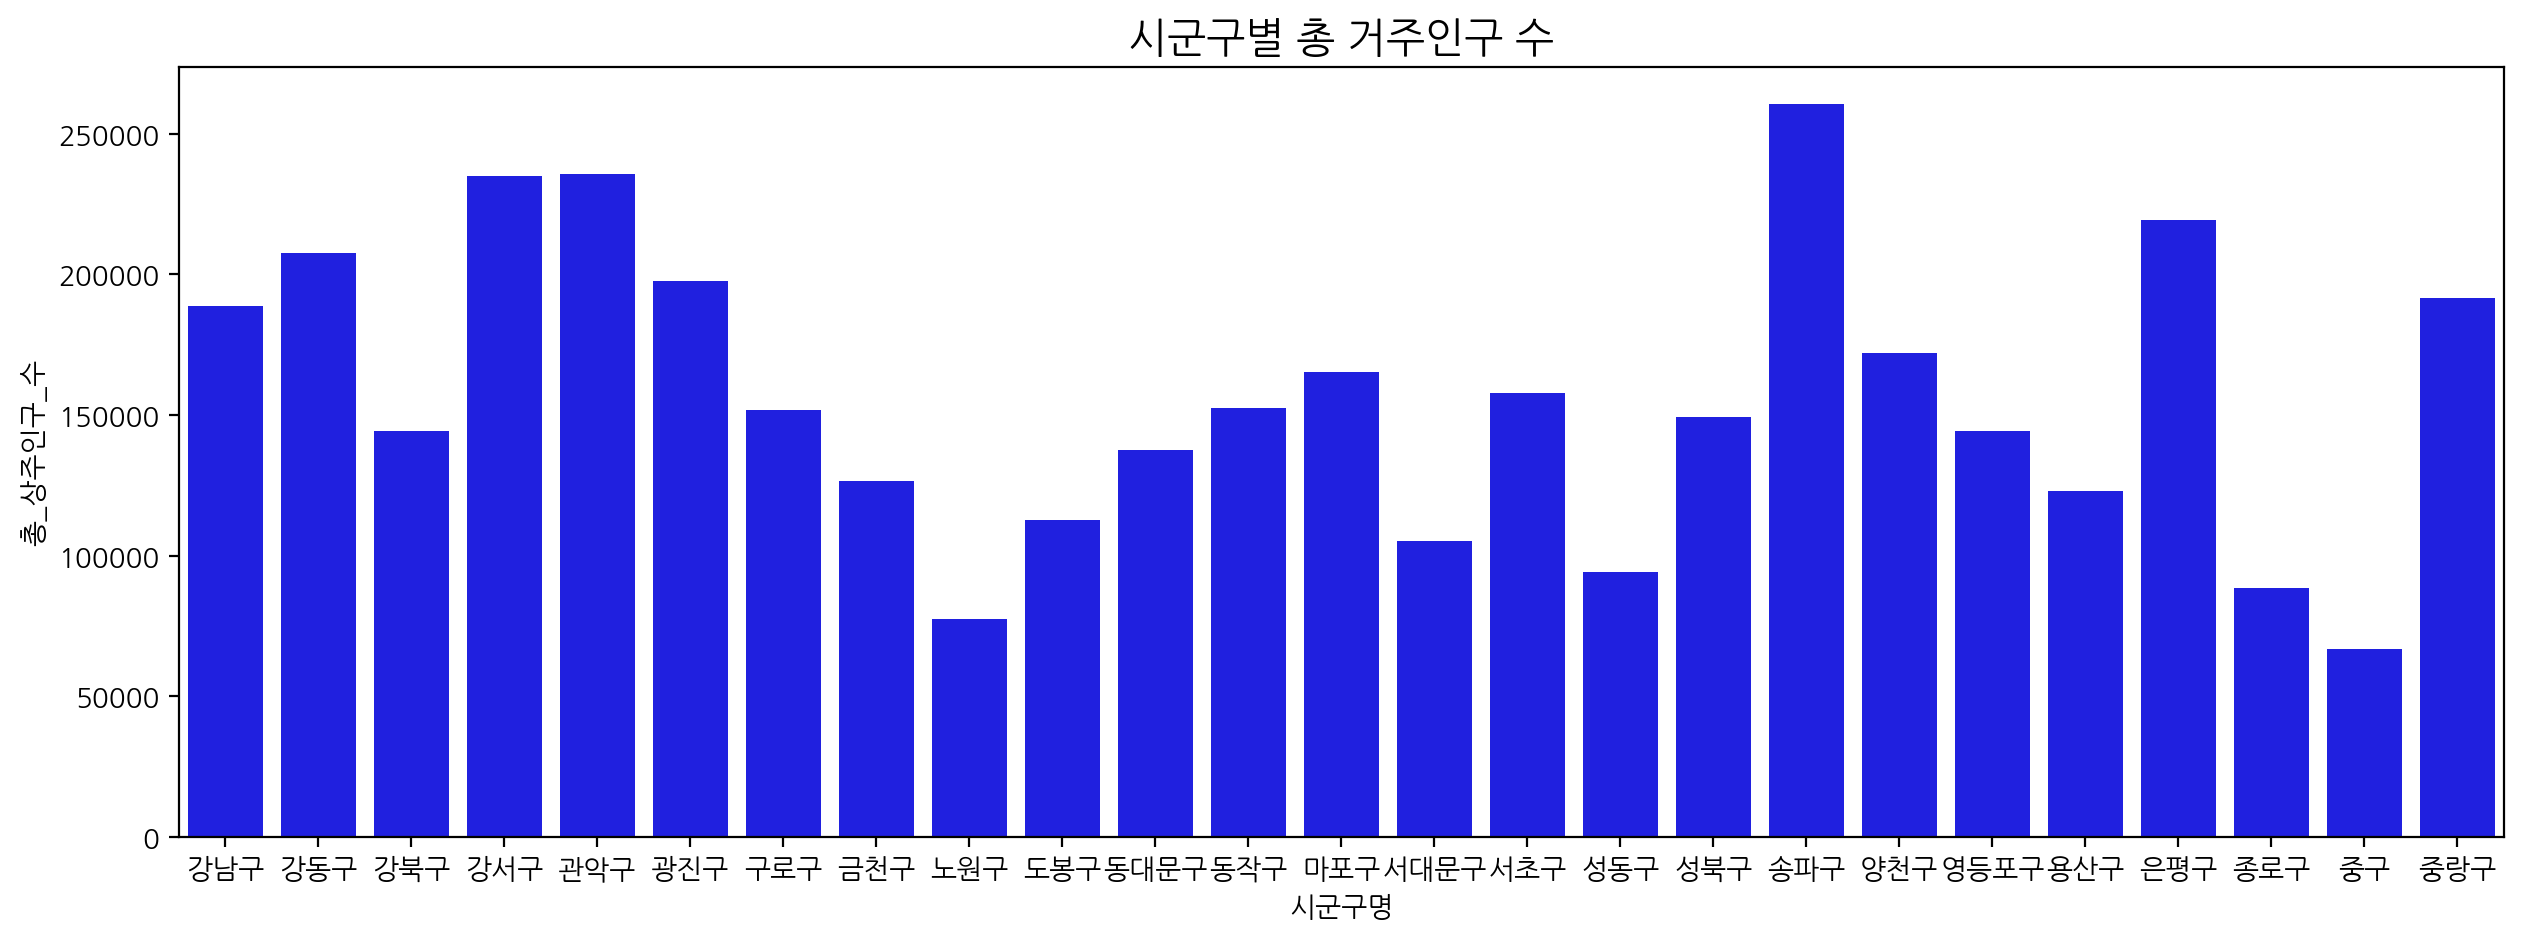

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(data=live_pop_m.sort_values("시군구명"), x="시군구명", y="총_상주인구_수",
            estimator=sum, ci=None, color="blue")
plt.title("시군구별 총 거주인구 수", fontsize=15)

## 구별 총 점포수

In [46]:
gu_store_num = maechul_m.pivot_table(index="시군구명", values="점포수", aggfunc=sum
                                      ).sort_values("점포수", ascending=False)
gu_store_num

,점포수
시군구명,
강남구,186287
중구,175718
서초구,117682
송파구,117149
종로구,110543
마포구,99849
영등포구,86740
강동구,78404
강서구,76835


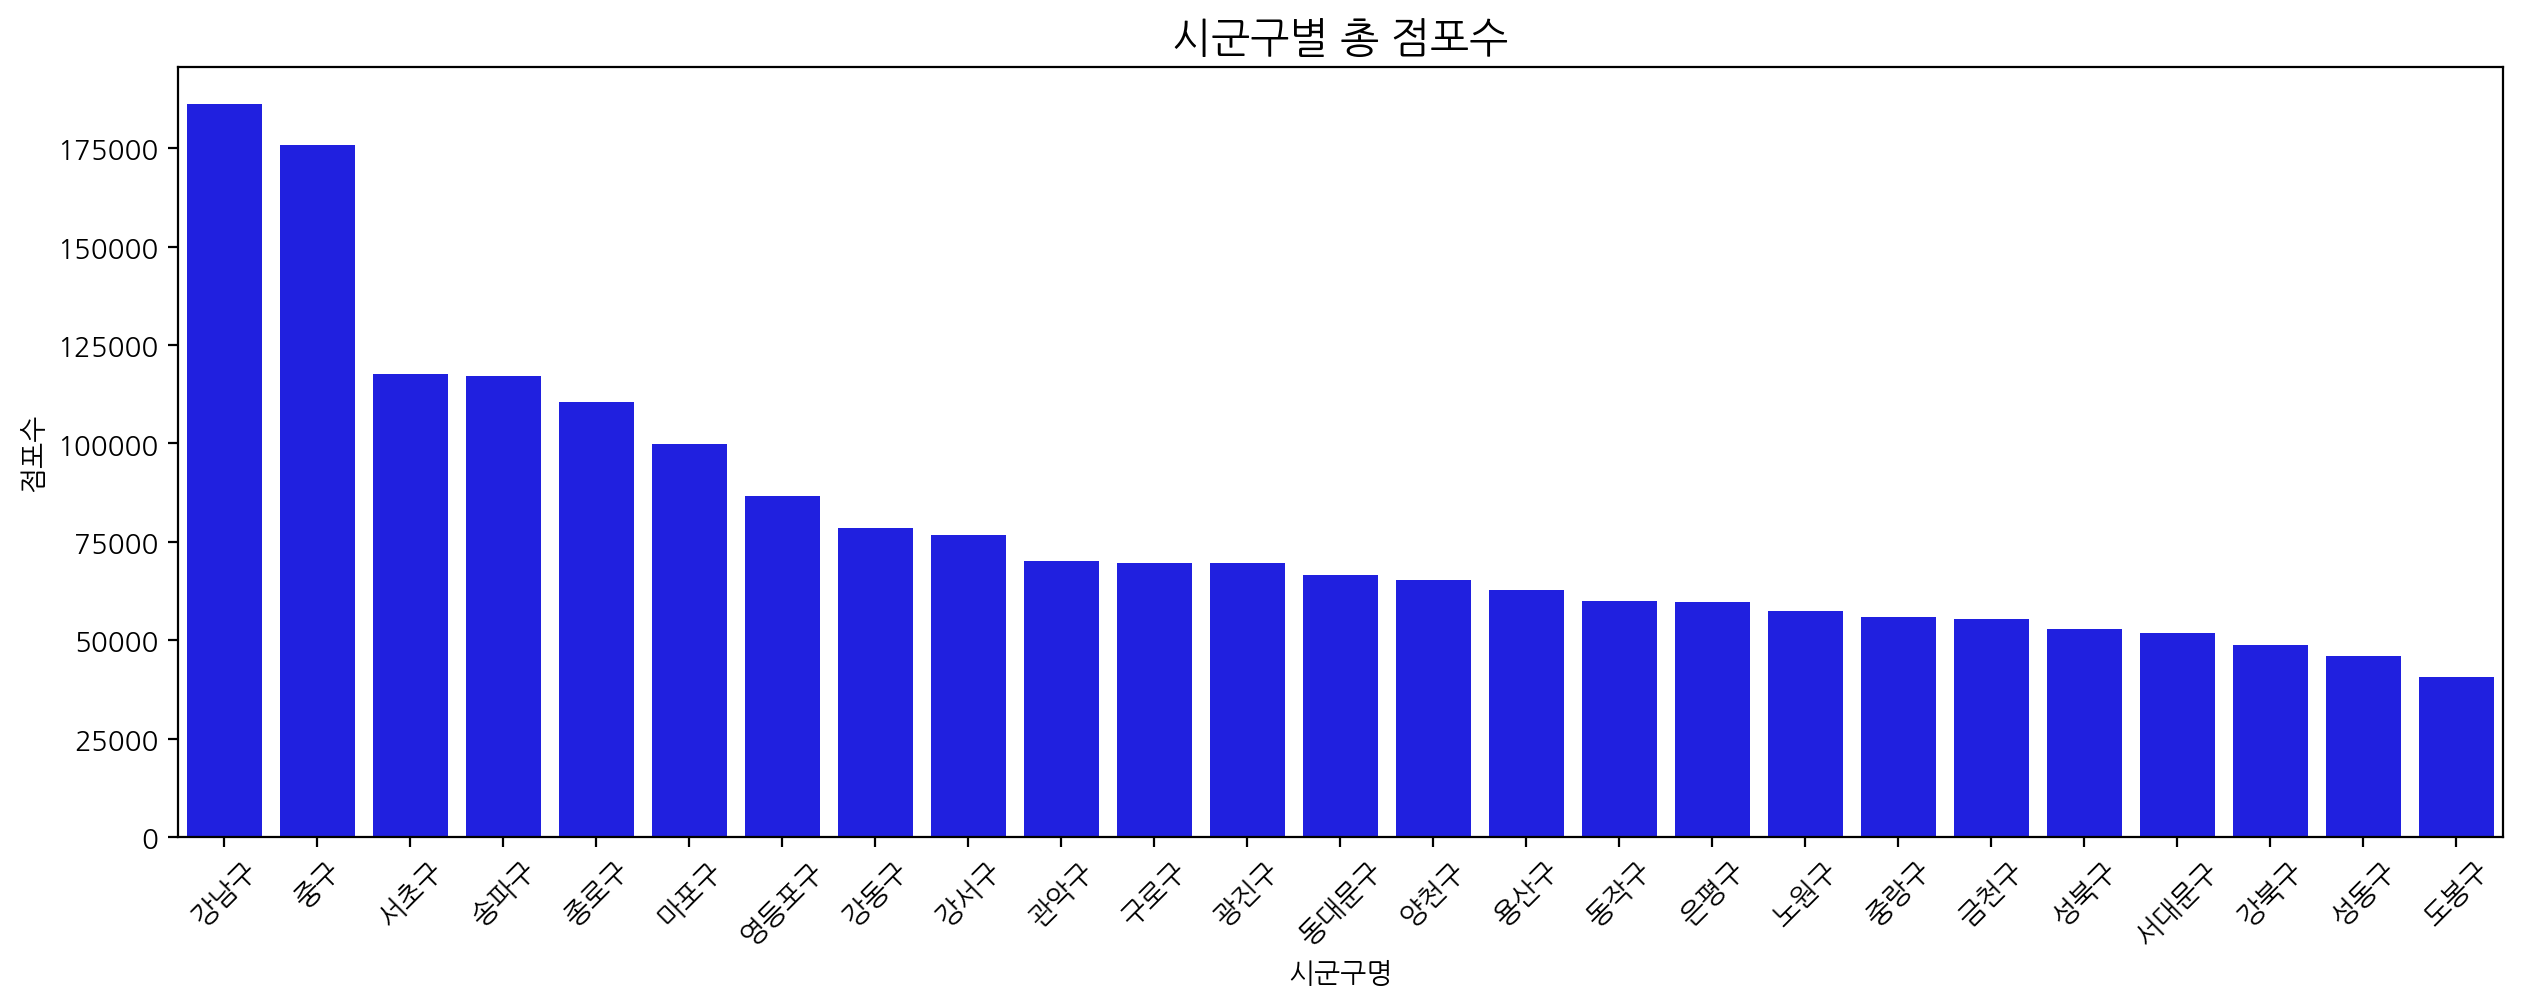

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(data=gu_store_num, x=gu_store_num.index, y="점포수", ci=None, color="blue")
plt.title("시군구별 총 점포수", fontsize=15)
plt.xticks(rotation=45);

Text(0.5, 1.0, '시군구별 총 점포수')

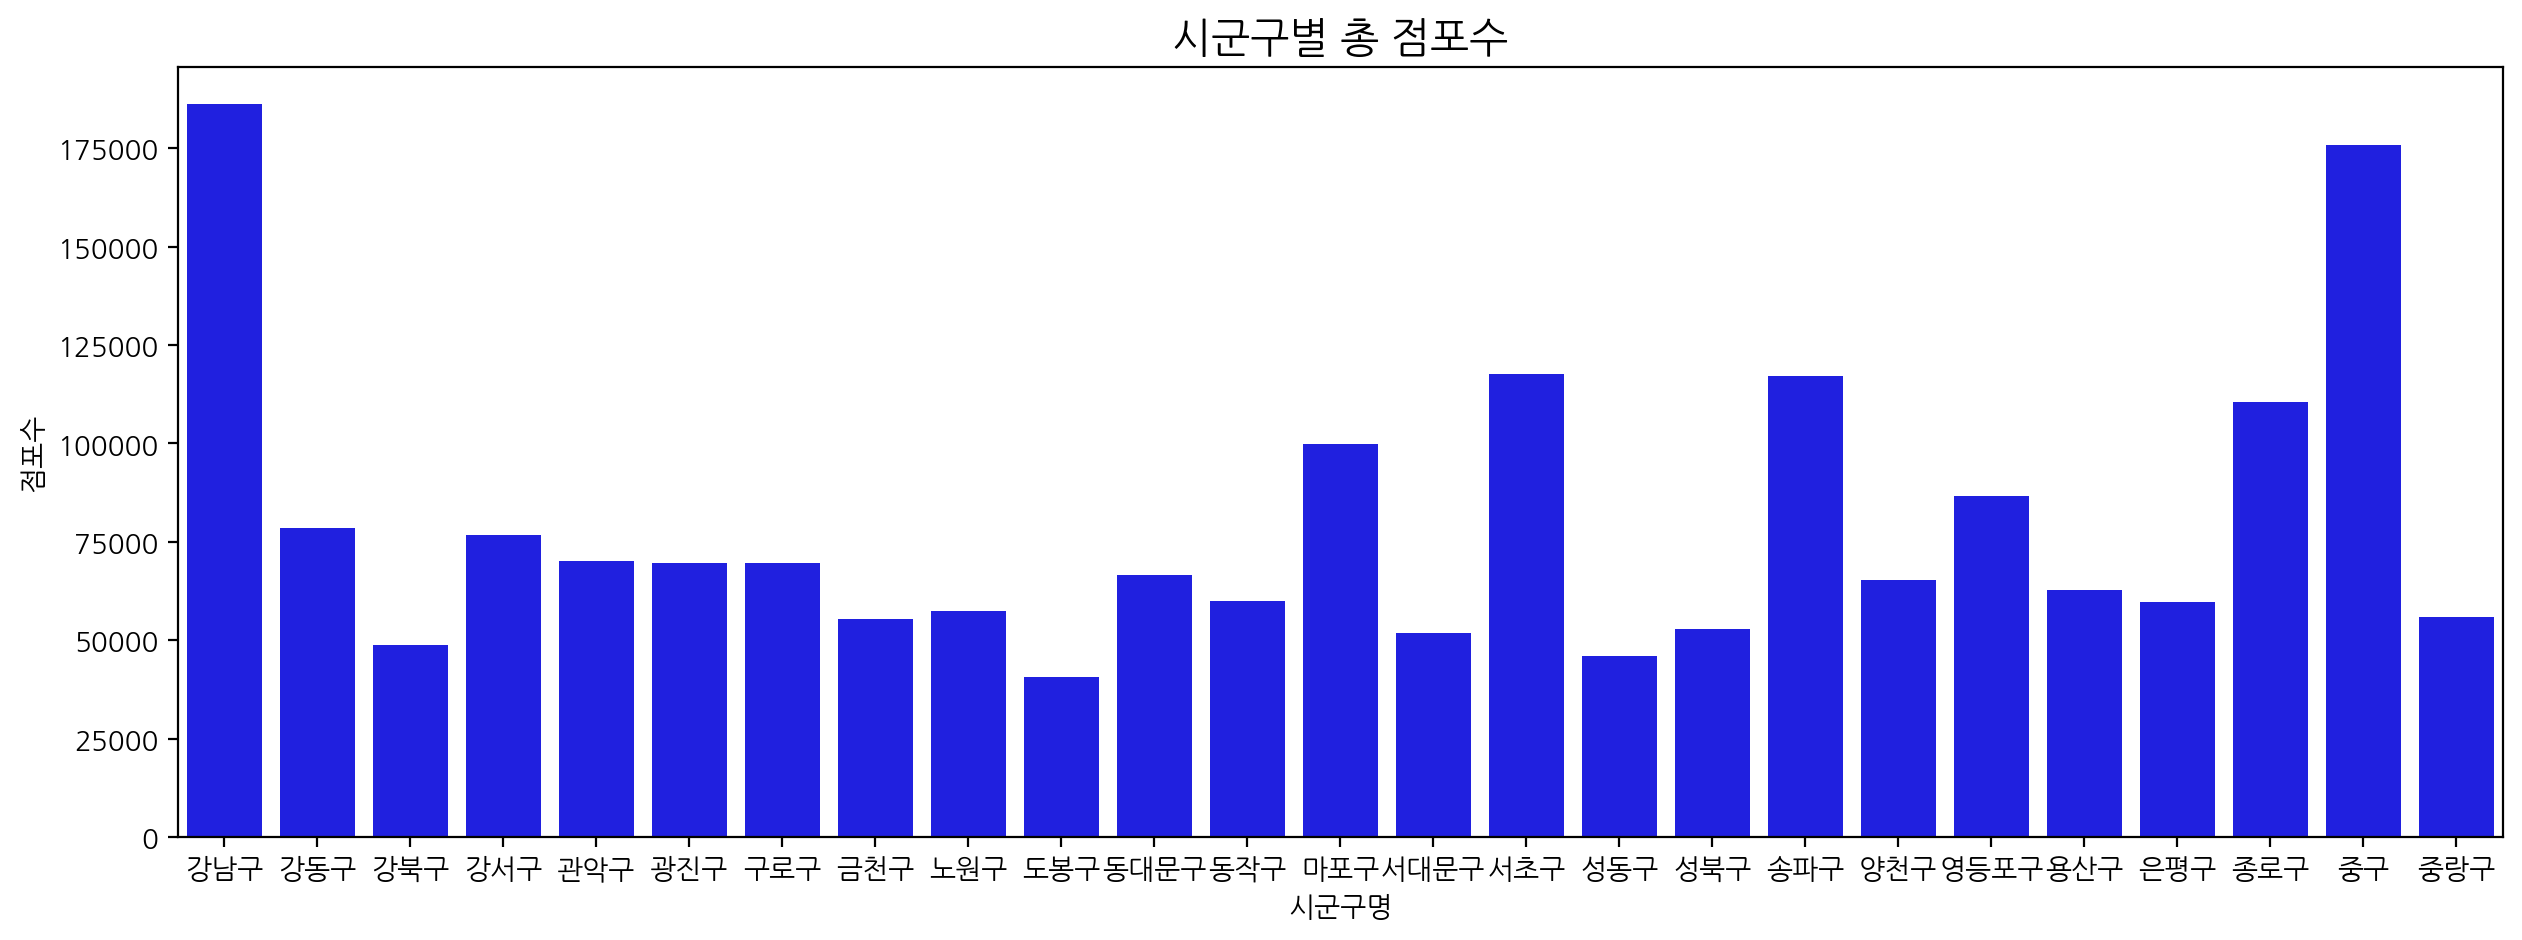

In [48]:
#구별 점포수
plt.figure(figsize=(15,5))
sns.barplot(data=maechul_m.sort_values("시군구명"), x="시군구명", y="점포수", 
            estimator=sum, ci=None, color="blue")
plt.title('시군구별 총 점포수', fontsize=15)

## 구별 총 매출

In [49]:
gu_maechul = maechul_m.pivot_table(index="시군구명", values="분기당_매출_금액", aggfunc=sum
                                      ).sort_values("분기당_매출_금액", ascending=False)
gu_maechul

,분기당_매출_금액
시군구명,
강남구,11860629585727
중구,7657299014267
용산구,6805869302151
송파구,6592152597145
서초구,6456707797349
종로구,5024576102321
영등포구,4785737276658
동대문구,4447563964479
마포구,4087617116756


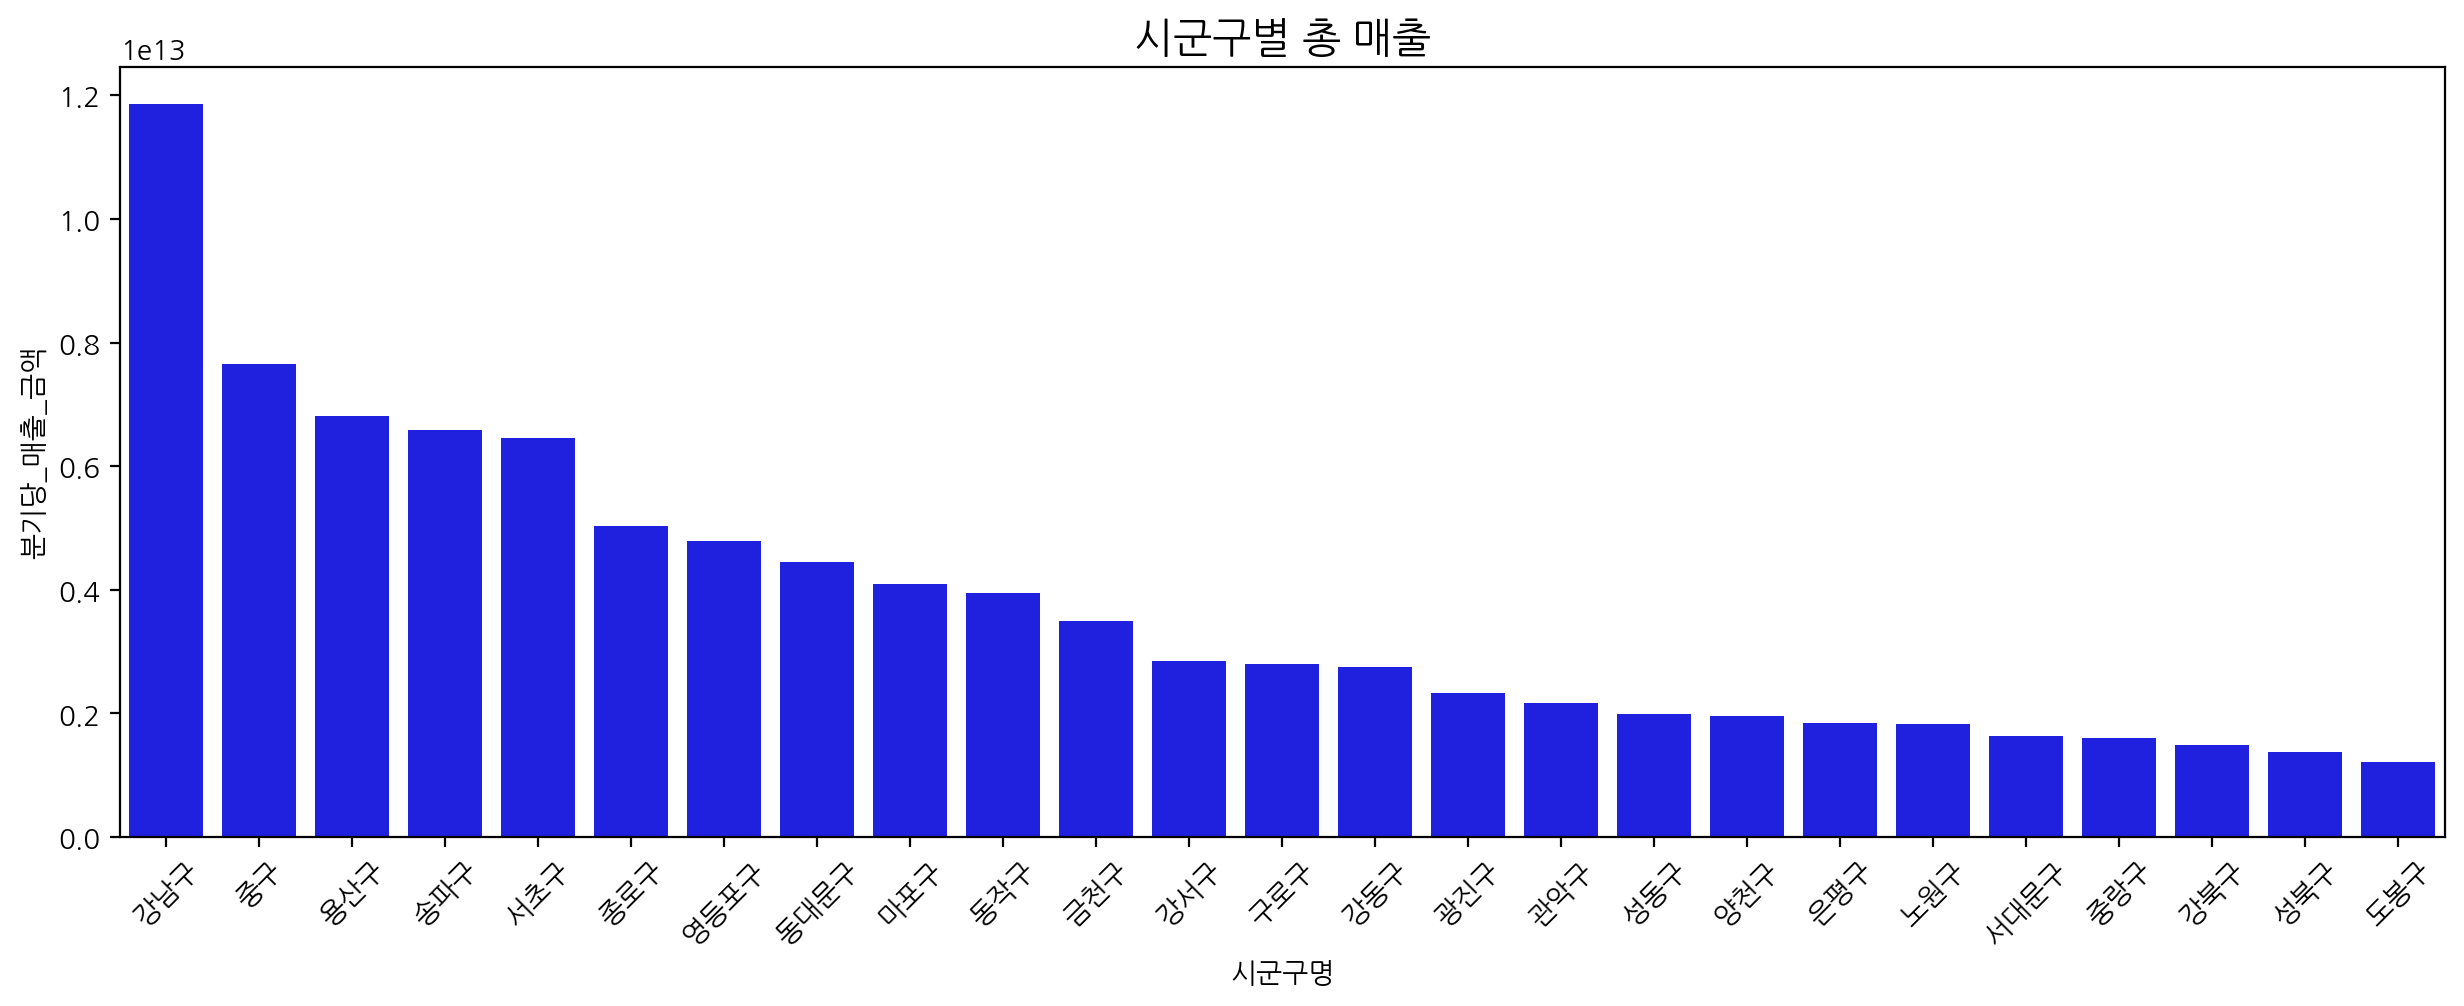

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(data=gu_maechul, x=gu_maechul.index, y="분기당_매출_금액", ci=None, color="blue")
plt.title("시군구별 총 매출", fontsize=15)
plt.xticks(rotation=45);

Text(0.5, 1.0, '시군구별 총 매출')

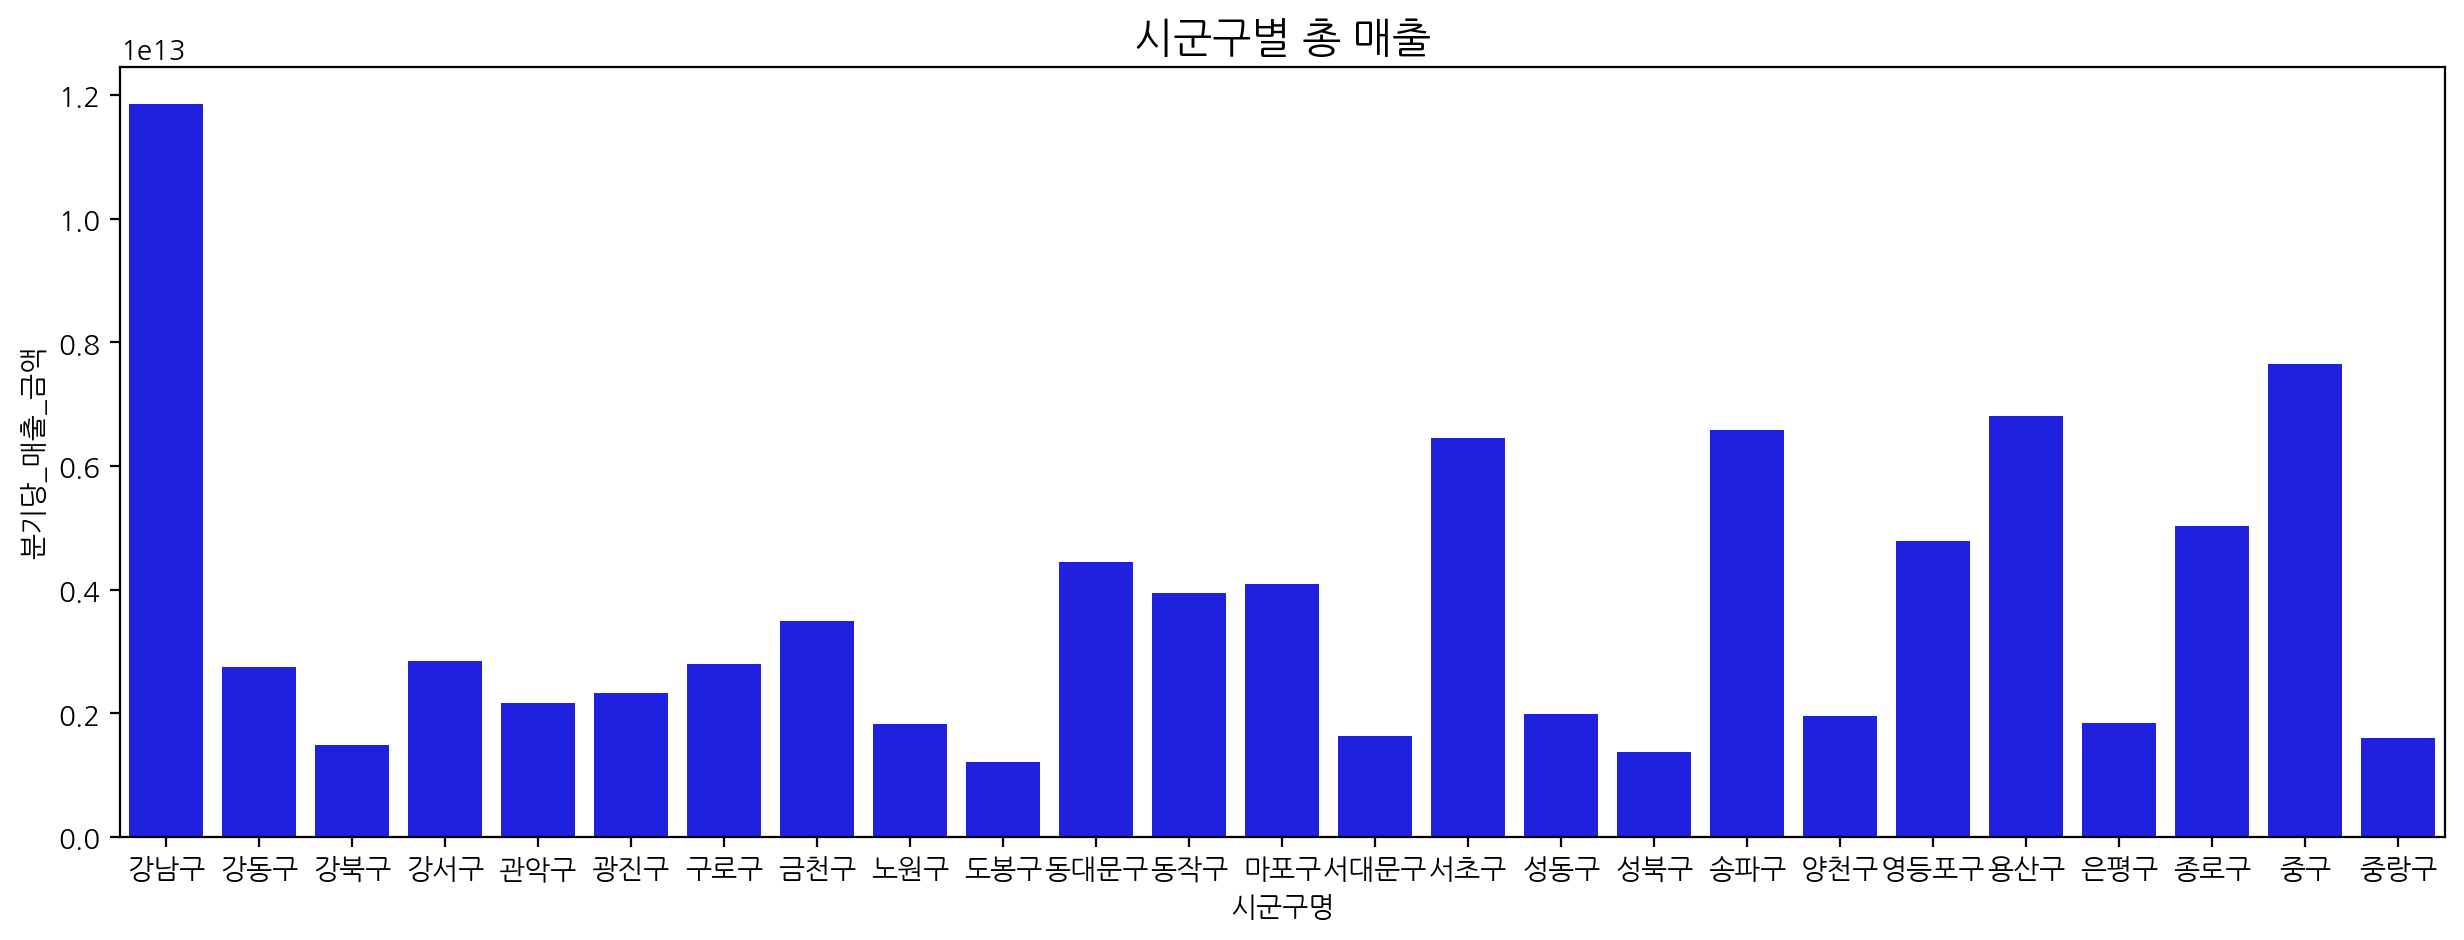

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(data=maechul_m.sort_values("시군구명"), x="시군구명", y="분기당_매출_금액" ,estimator=sum, ci=None, color="blue")
plt.title("시군구별 총 매출", fontsize=15)

## 매출, 점포수 한 그래프에 시각화

In [52]:
# 매출 순위에 따라 '시군구'정렬, 매출과 점포수 merge
# 합치지 않으면 매출 순위에 따른 '시군구'에 맞춘 점포수 값이 제대로 적용되지 않음.
gu_m = pd.merge(gu_maechul, gu_store_num, on=['시군구명'], how='left')
gu_m

,분기당_매출_금액,점포수
시군구명,,
강남구,11860629585727,186287
중구,7657299014267,175718
용산구,6805869302151,62840
송파구,6592152597145,117149
서초구,6456707797349,117682
종로구,5024576102321,110543
영등포구,4785737276658,86740
동대문구,4447563964479,66655
마포구,4087617116756,99849


In [53]:
# x_label 은 매출 순위순 시군구 정렬 == gu_m.index
x_label = ['강남구', '중구', '용산구', '송파구', '서초구', '종로구', '영등포구', '동대문구', '마포구', '동작구',
       '금천구', '강서구', '구로구', '강동구', '광진구', '관악구', '성동구', '양천구', '은평구', '노원구',
       '서대문구', '중랑구', '강북구', '성북구', '도봉구']
y1 = gu_m["분기당_매출_금액"]
y2 = gu_m["점포수"]

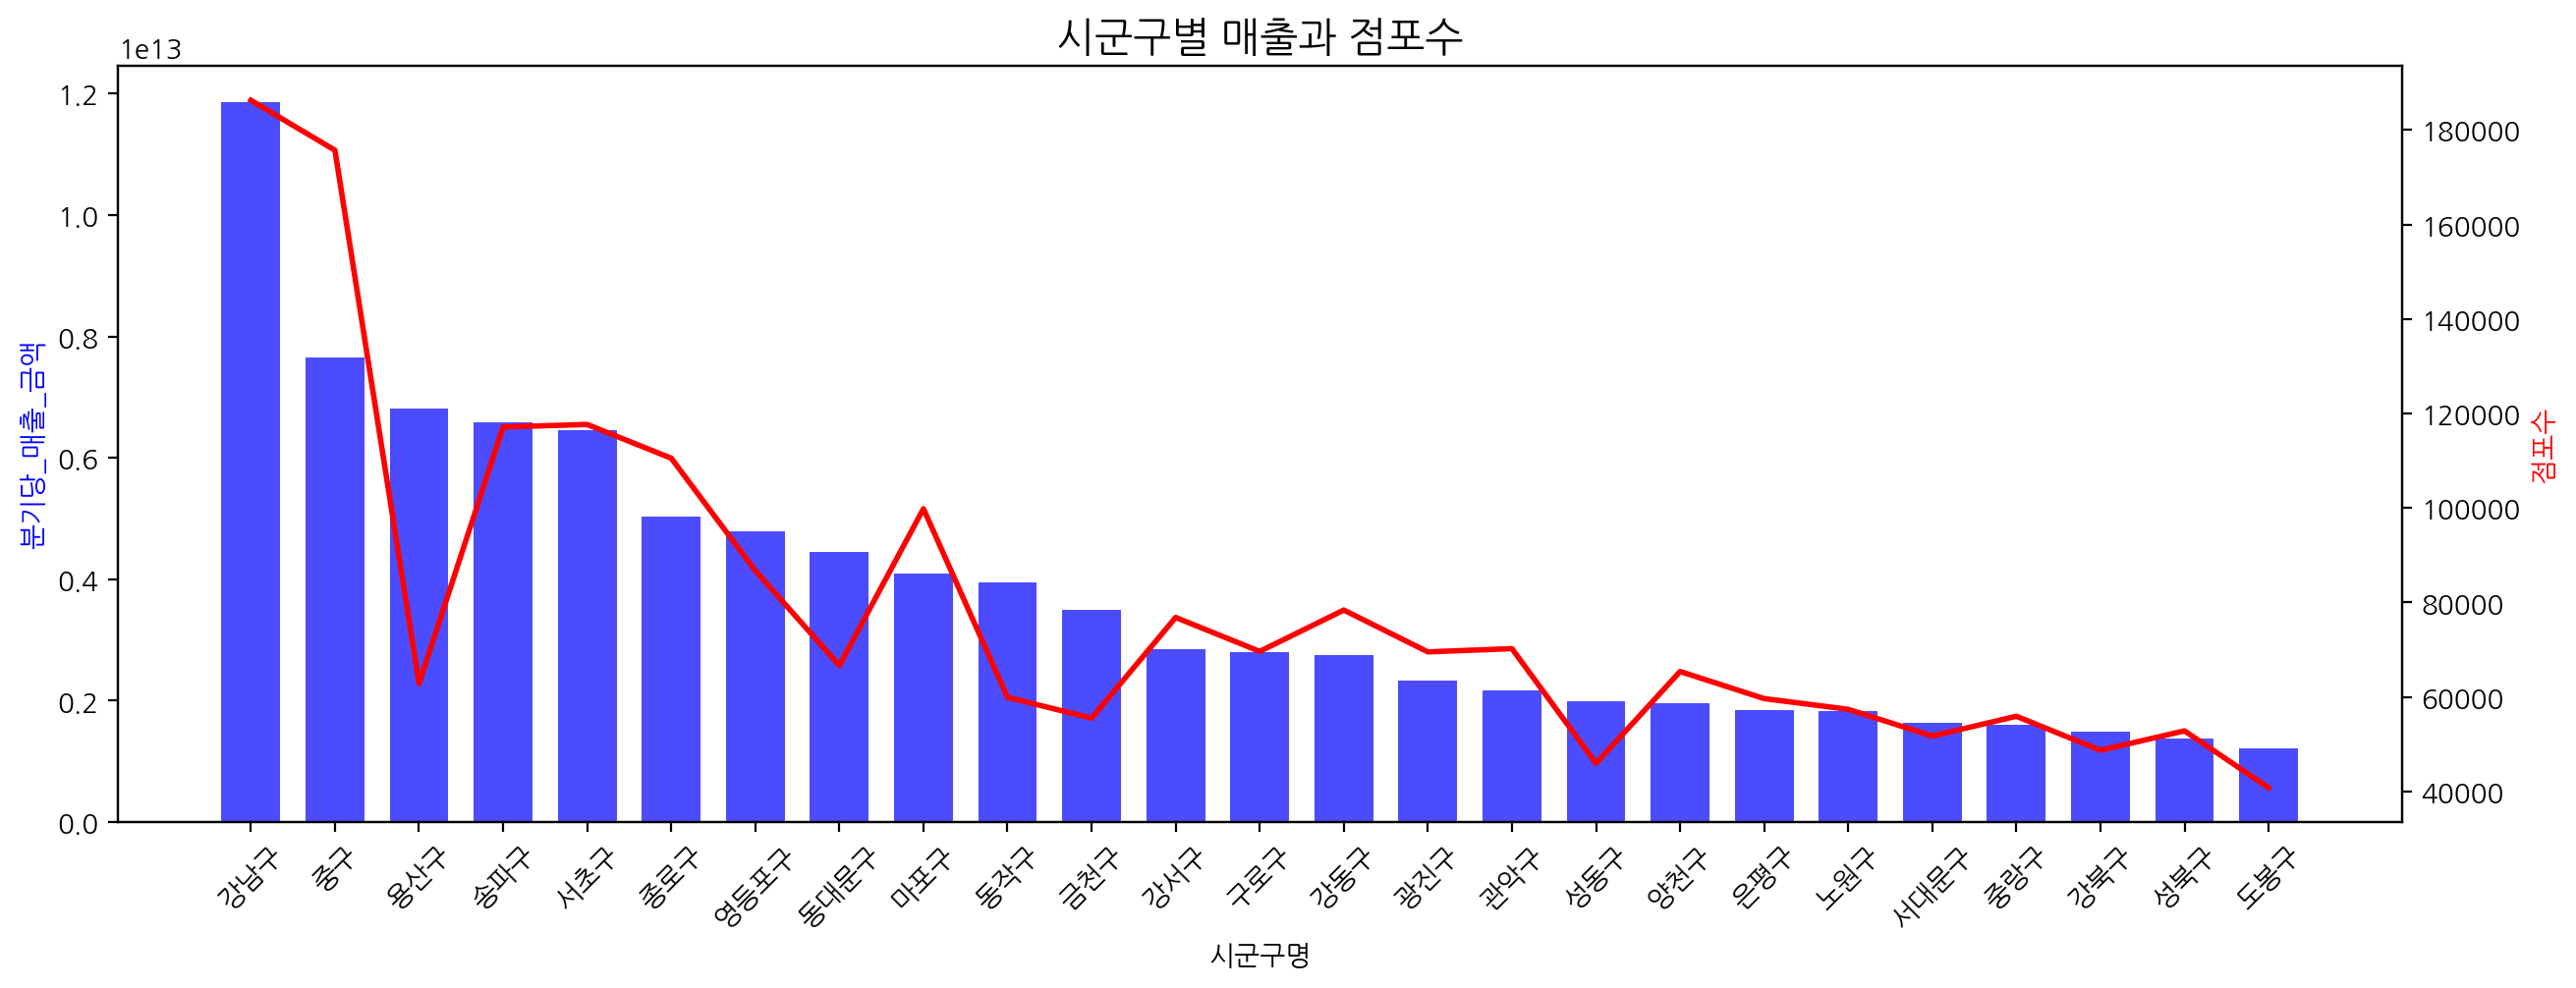

In [54]:
plt.rcParams['figure.figsize']=(15,5)

fig, ax1 = plt.subplots()

ax1.bar(x_label, y1, color="blue", width=0.7, alpha=0.7)
ax1.set_xlabel("시군구명")
ax1.set_ylabel("분기당_매출_금액", color="blue")
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(x_label, y2, color="red", linestyle="-", linewidth=2)
ax2.set_ylabel("점포수", color="red")

plt.title("시군구별 매출과 점포수", fontsize=15)
plt.show();

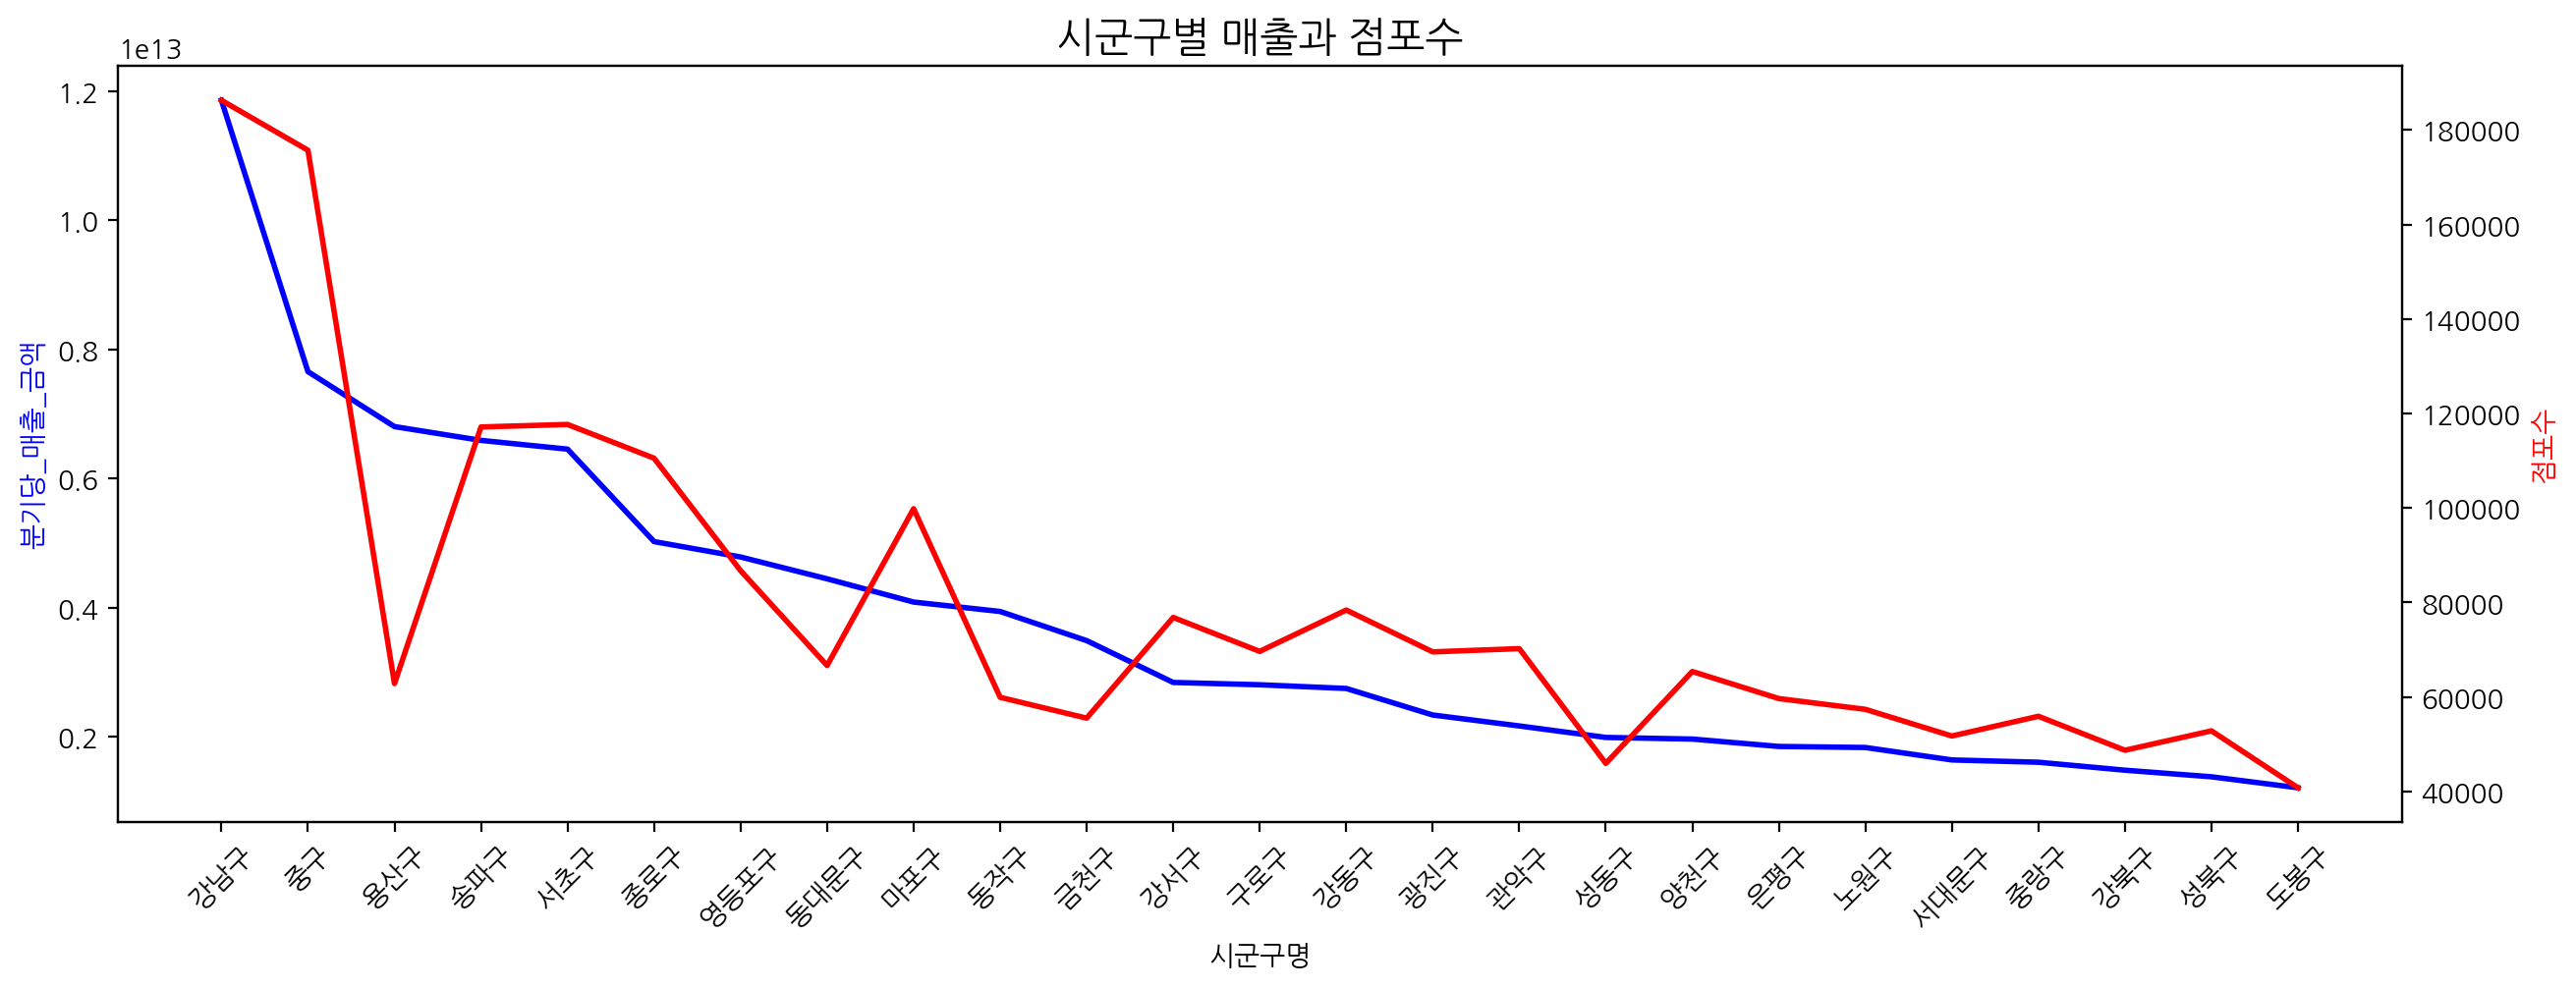

In [63]:
plt.rcParams['figure.figsize']=(15,5)

fig, ax1 = plt.subplots()

ax1.plot(x_label, y1, color="blue", linestyle="-", linewidth=2)
ax1.set_xlabel("시군구명")
ax1.set_ylabel("분기당_매출_금액", color="blue")
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(x_label, y2, color="red", linestyle="-", linewidth=2)
ax2.set_ylabel("점포수", color="red")

plt.title("시군구별 매출과 점포수", fontsize=15)
plt.show();

# 상관관계

## 매출 컬럼 포함 시 

In [56]:
corr_all = df_all.corr()
mask = np.triu(np.ones_like(corr_all))

In [57]:
print("Find most important features")
corr_all.sort_values(["분기당_매출_금액"], ascending = False, inplace = True)
print(corr_all.분기당_매출_금액)

Find most important features
분기당_매출_금액        1.000000
금요일_매출           0.997745
수요일_매출           0.993200
남성_매출            0.992166
목요일_매출           0.991831
                   ...   
10대_상주인구         0.201910
여성_50대_상주인구      0.200316
여성_10대_상주인구      0.199904
여성_60대이상_상주인구    0.196763
기준_년코드                NaN
Name: 분기당_매출_금액, Length: 69, dtype: float64


In [58]:
top_corr_features = corr_all.index[abs(corr_all["분기당_매출_금액"])>0.5]
top_corr_features

Index(['분기당_매출_금액', '금요일_매출', '수요일_매출', '남성_매출', '목요일_매출', '화요일_매출', '월요일_매출',
       '11~14시_매출', '14~17시_매출', '40대_매출', '50대_매출', '17~21시_매출', '여성_매출',
       '30대_매출', '토요일_매출', '일요일_매출', '06~11시_매출', '20대_매출', '60대이상_매출', '점포수',
       '21~24시_매출', '10대_매출', '00~06시_매출', '14~17시_생활인구', '11~14시_생활인구',
       '30대_생활인구', '40대_생활인구', '17~21시_생활인구', '행정동_코드', '상권_코드', '목요일_생활인구',
       '남성_생활인구', '화요일_생활인구', '수요일_생활인구', '금요일_생활인구'],
      dtype='object')

## 매출 컬럼 제외 시

In [59]:
df_all_mini_drop = df_all_mini.drop(columns=['행정동_코드', '상권_코드', '기준_년코드'])

In [60]:
print("Find most important features")
corr_mini_drop = df_all_mini_drop.corr()
corr_mini_drop.sort_values(["분기당_매출_금액"], ascending = False, inplace = True)
print(corr_mini_drop.분기당_매출_금액)

Find most important features
분기당_매출_금액        1.000000
점포수              0.781231
14~17시_생활인구      0.604912
11~14시_생활인구      0.602338
30대_생활인구         0.544451
40대_생활인구         0.531925
17~21시_생활인구      0.520993
목요일_생활인구         0.511832
남성_생활인구          0.511614
화요일_생활인구         0.510564
수요일_생활인구         0.508644
금요일_생활인구         0.508127
월요일_생활인구         0.499305
20대_생활인구         0.490192
06~11시_생활인구      0.483671
총_생활인구_수         0.483477
50대_생활인구         0.455561
여성_생활인구          0.454974
토요일_생활인구         0.433825
일요일_생활인구         0.388485
21~24시_생활인구      0.376674
60대이상_생활인구       0.356471
30대_상주인구         0.348522
여성_30대_상주인구      0.347405
남성_30대_상주인구      0.344526
여성_20대_상주인구      0.324770
00~06시_생활인구      0.320630
20대_상주인구         0.317824
남성_20대_상주인구      0.303358
남성_40대_상주인구      0.294520
남성_상주인구          0.294042
40대_상주인구         0.292198
총_상주인구_수         0.289147
10대_생활인구         0.288236
여성_40대_상주인구      0.286540
여성_상주인구          0.283043
남성_50대_상주인구      0.255570
남성_60대이상_

In [61]:
top_corr_features = corr_mini_drop.index[abs(corr_mini_drop["분기당_매출_금액"])>0.5]
corrmat = df_all_mini_drop[top_corr_features].corr()
mask = np.triu(np.ones_like(corrmat))

Text(0.5, 1.0, '매출과 상관계수')

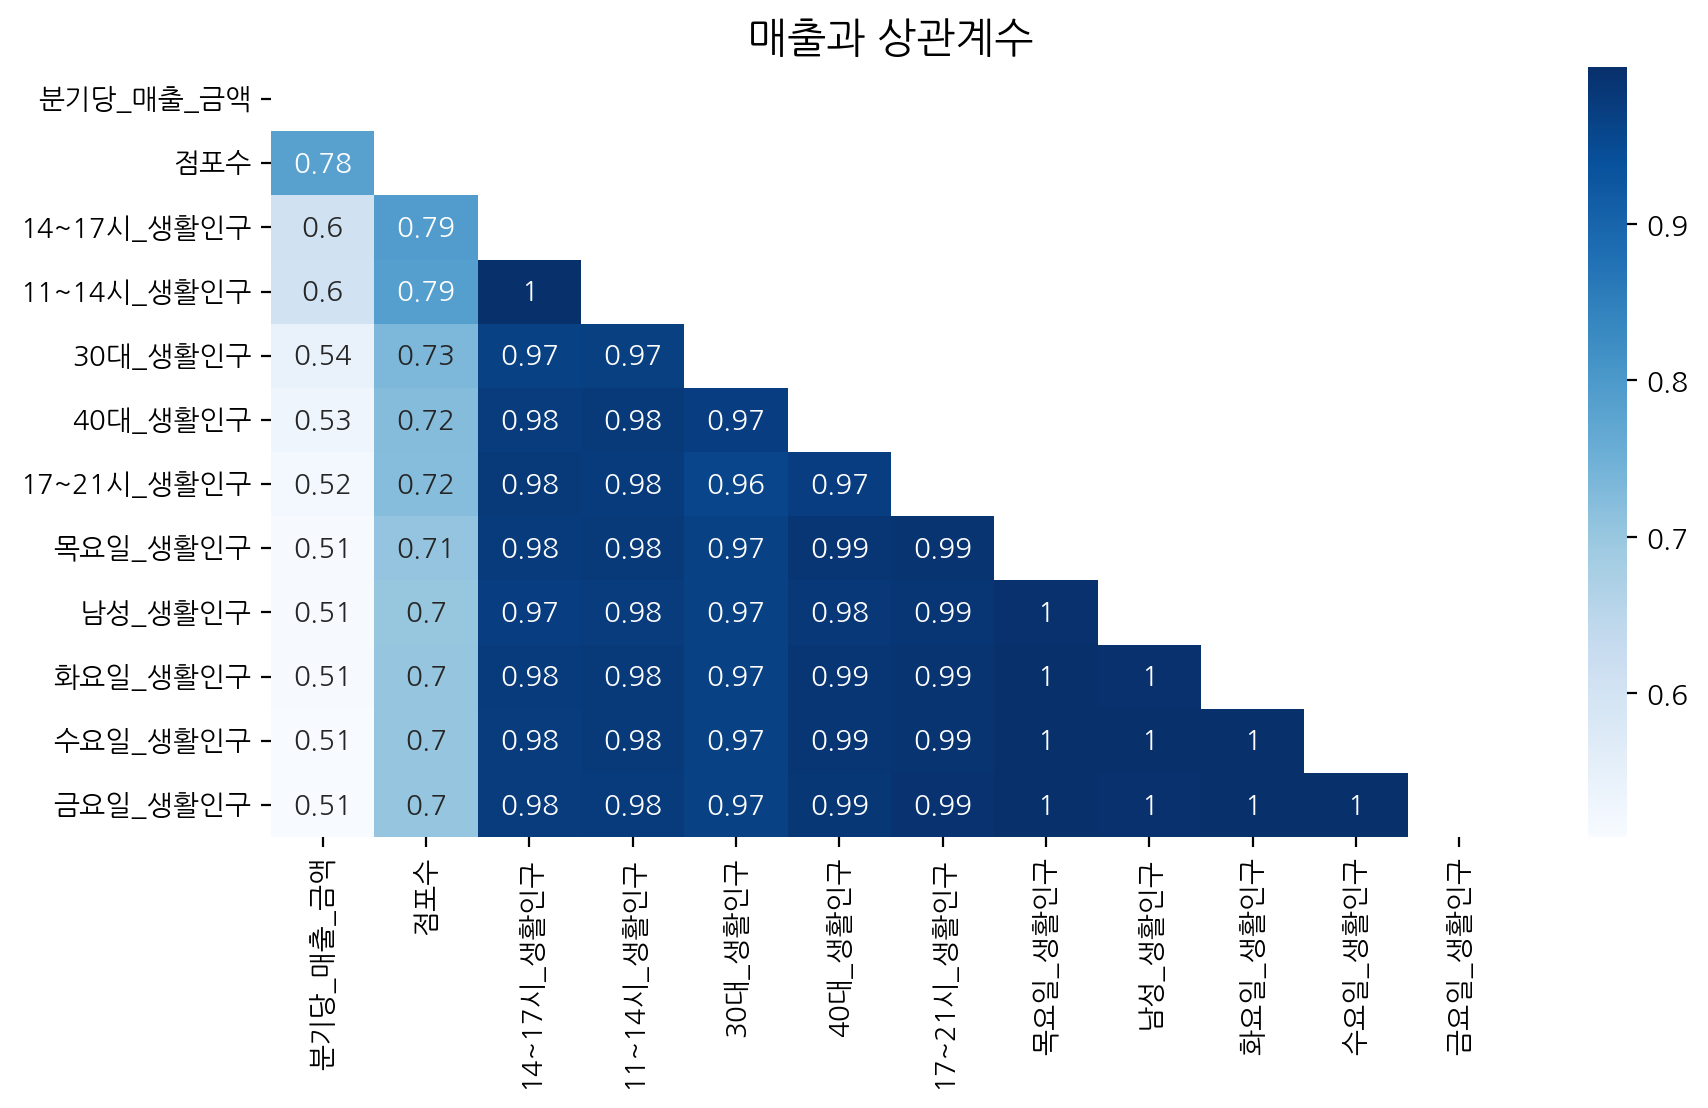

In [62]:
plt.figure(figsize=(10,5))
g = sns.heatmap(df_all_mini_drop[top_corr_features].corr(),annot=True,cmap="Blues", mask=mask)
plt.title("매출과 상관계수", fontsize=15)